## setting - run the cell bellow only for using google collab as we did

בכל חלק בקוד מעל החלק של טעינת הקובץ בקולאב יש שורה עם הערה לטעינת קובץ בצורה רגילה !

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Part 1 - Data cleaning, sorting and converting values

In [ ]:
import numpy as np
import pandas as pd
import random # ייבוא מודול random להגרלת מספרים אקראיים

# הגדרת נתיבים לקבצים
#אם לא משתמשים בקולאב להריץ את זה
#input_csv_path ='student_prediction.csv'
input_csv_path = '/content/drive/MyDrive/לימודים שנה ב/Project data science/Project_Students_Omri_Nir/student_prediction.csv'
output_csv_path = '/content/drive/MyDrive/לימודים שנה ב/Project data science/Project_Students_Omri_Nir/Students_correct_data.csv'

# מילון מיפויים עבור עמודות קיימות
attr_map = {
    'age': {
        1: '18-21',
        2: '22-25',
        3: 'Above 26'
    },
    'gender': {1: 'Female', 2: 'Male'},
    'hs_type': {
        1: 'Private',
        2: 'State',
        3: 'Other'
    },
    'scholarship': {
        1: '0%',
        2: '25%',
        3: '50%',
        4: '75%',
        5: '100%'
    },
    'work': {1: 'Yes', 2: 'No'},
    'activity': {1: 'Yes', 2: 'No'},
    'partner': {1: 'Yes', 2: 'No'},
    'salary': {
        1: '$135-200',
        2: '$201-270',
        3: '$271-340',
        4: '$341-410',
        5: 'Above $410',
    },
    'transport': {
        1: 'Bus',
        2: 'Private car/taxi',
        3: 'Bicycle',
        4: 'Other'
    },
    'living': {
        1: 'Rental',
        2: 'Dormitory',
        3: 'With family',
        4: 'Other'
    },
    'mother_edu': {
        1: 'Primary school',
        2: 'Secondary school',
        3: 'High school',
        4: 'University',
        5: 'MSc.',
        6: 'Ph.D.'
    },
    'father_edu': {
        1: 'Primary school',
        2: 'Secondary school',
        3: 'High school',
        4: 'University',
        5: 'MSc.',
        6: 'Ph.D.'
    },
    'kids': {
        1: 'Married',
        2: 'Divorced',
        3: 'Died - one of them or both'
    },
    'mother_job': {
        1: 'Retired',
        2: 'Housewife',
        3: 'Government officer',
        4: 'Private sector employee',
        5: 'Self-employment',
        6: 'Other'
    },
    'father_job': {
        1: 'Retired',
        2: 'Government officer',
        3: 'Private sector employee',
        4: 'Self-employment',
        5: 'Other'
    },
    'study_hrs': {
        1: 'None',
        2: '<5 hours',
        3: '6-10 hours',
        4: '11-20 hours',
        5: 'More than 20 hours'
    },
    'read_freq': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Often'
    },
    'read_freq_sci': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Often'
    },
    'attend_dept': {1: 'Yes', 2: 'No'},
    'impact': {
        1: 'Positive',
        2: 'Negative',
        3: 'Neutral'
    },
    'attend': {1: 'Yes', 2: 'No'},
    'prep_study': {
        1: 'Alone',
        2: 'With friends',
        3: 'Not applicable'
    },
    'prep_exam': {
        1: 'Closest date to the exam',
        2: 'Regularly during the semester',
        3: 'Never'
    },
    'notes': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Always'
    },
    'listens': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Always'
    },
    'likes_discuss': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Always'
    },
    'classroom': {
        1: 'Not useful',
        2: 'Useful',
        3: 'Not applicable'
    },
    'cuml_gpa': {
        1: '<2.00',
        2: '2.00-2.49',
        3: '2.50-2.99',
        4: '3.00-3.49',
        5: 'Above 3.49'
    },
    'exp_gpa': {
        1: '<2.00',
        2: '2.00-2.49',
        3: '2.50-2.99',
        4: '3.00-3.49',
        5: 'Above 3.49'
    }
}

df = pd.read_csv(input_csv_path)

# המרת שמות העמודות לאותיות קטנות
df.columns = [x.lower() for x in df.columns]


if 'grade' in df.columns:
    df = df.rename(columns={'grade': 'ordinal_grade'})
    print("שם העמודה 'grade' שונה בהצלחה ל-'ordinal_grade'.")
else:
    print("אזהרה: העמודה 'grade' לא נמצאה. לא בוצע שינוי שם לעמודה זו.")

# יישום המיפויים הקיימים על העמודות הרלוונטיות
for col in df.columns.tolist():
    if col not in attr_map:
        continue

    if col == '#_siblings':
        df[col] = df[col].apply(lambda x: '5 or above' if x == 5 else str(x))
    else:
        df[col] = df[col].map(attr_map[col])
        # טיפול בערכים חסרים לאחר המיפוי
        df[col] = df[col].fillna(df[col].map(lambda x: attr_map[col].get(str(x), x)))



grade_ranges_map = {
    0: '0-59',
    1: '60-65',
    2: '66-71',
    3: '72-77',
    4: '78-83',
    5: '84-89',
    6: '90-95',
    7: '96-100'
}


grade_column_name = 'ordinal_grade'


if grade_column_name in df.columns:
    # המרת הציונים המספריים לטווחי ציונים
    df[grade_column_name + '_range'] = df[grade_column_name].map(grade_ranges_map)

    # פונקציה להגרלת ציון רנדומלי בתוך טווח נתון
    def generate_random_score(score_range_str):
        if pd.isna(score_range_str):
            return np.nan
        try:
            min_score, max_score = map(int, score_range_str.split('-'))
            return random.randint(min_score, max_score)
        except ValueError:
            print(f"אזהרה: פורמט טווח ציון לא חוקי: {score_range_str}. מחזיר NaN.")
            return np.nan

    # הוספת עמודה חדשה עם ציון רנדומלי
    df['grade'] = df[grade_column_name + '_range'].apply(generate_random_score)
    print(f"עמודות חדשות '{grade_column_name}_range' ו-'random_score_in_range' נוספו בהצלחה.")
else:
    print(f"שגיאה: העמודה '{grade_column_name}' לא נמצאה בקובץ הנתונים.")



# שמירת הקובץ המעודכן
df.to_csv(output_csv_path, index=False)

print('מיפויים יושמו וקובץ CSV חדש נשמר בנתיב:', output_csv_path)

שם העמודה 'grade' שונה בהצלחה ל-'ordinal_grade'.
עמודות חדשות 'ordinal_grade_range' ו-'random_score_in_range' נוספו בהצלחה.
מיפויים יושמו וקובץ CSV חדש נשמר בנתיב: /content/drive/MyDrive/לימודים שנה ב/Project data science/Project_Students_Omri_Nir/Students_correct_data.csv


# Part 2 - Data vizualization + Statistical calculations


Generating Plot 1: Overall Distribution of Student Scores...


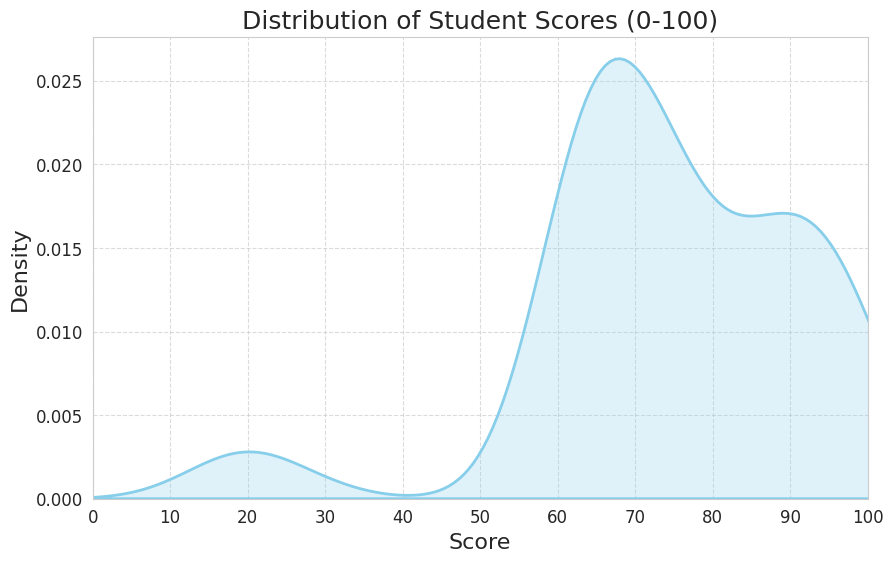

Plot 1 generated successfully.

Generating Plot 2: Distribution of Student Scores by Gender...


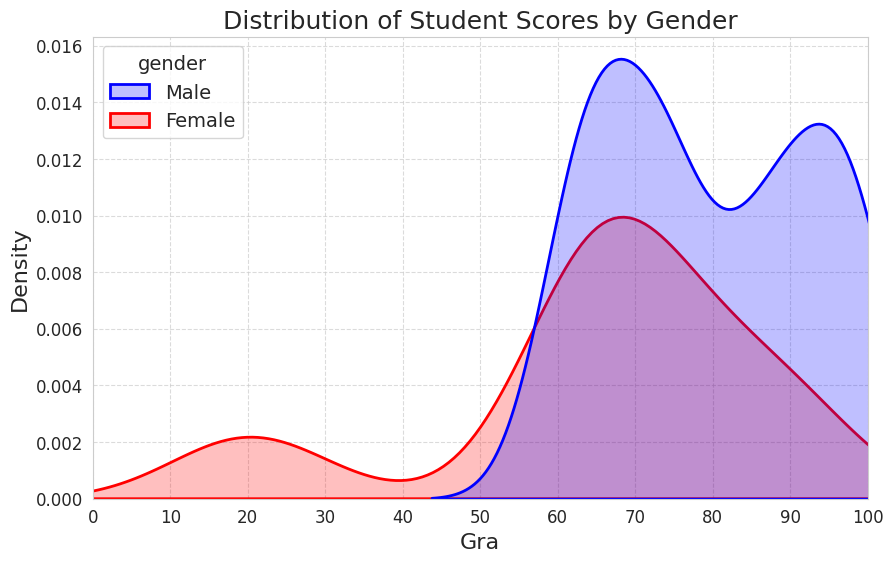

Plot 2 generated successfully.


In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
# הגדרת גודל פונט כללי לפלוטים
plt.rcParams.update({'font.size': 14, 'axes.labelsize': 16, 'xtick.labelsize': 12, 'ytick.labelsize': 12, 'axes.titlesize': 18})

#להריץ את זה אם לא משתמשים בקולאב
#df = pd.read_csv('Students_correct_data.csv')

df = pd.read_csv('/content/drive/MyDrive/לימודים שנה ב/Project data science/Project_Students_Omri_Nir/Students_correct_data.csv')
# Plot 1: Distribution of overall continuous scores (grade)
print("\nGenerating Plot 1: Overall Distribution of Student Scores...")
if 'grade' in df.columns and not df['grade'].empty:
    plt.figure(figsize=(10, 6)) # הגדרת גודל הגרף


    # שימוש ב-kdeplot
    sns.kdeplot(
        data=df,
        x='grade', # שימוש בעמודה 'grade' עבור הציונים הרציפים
        fill=True, # מילוי השטח מתחת לעקומה
        color='skyblue', # צבע העקומה
        linewidth=2 # עובי קו העקומה
    )

    plt.title('Distribution of Student Scores (0-100)') # כותרת הגרף באנגלית
    plt.xlabel('Score') # כותרת ציר X באנגלית
    plt.ylabel('Density') # כותרת ציר Y באנגלית
    plt.grid(True, linestyle='--', alpha=0.7) # הוספת רשת לגרף
    plt.xlim(0, 100) # הגבלת טווח ציר X מ-0 עד 100
    plt.xticks(np.arange(0, 101, 10)) # הגדרת תגיות על ציר X בקפיצות של 10
    plt.show() # הצגת הגרף
    print("Plot 1 generated successfully.")
else:
    print("Error: 'grade' column not found or is empty. Cannot generate Plot 1.")

# Plot 2: Distribution of continuous scores by Gender (Female/Male)
print("\nGenerating Plot 2: Distribution of Student Scores by Gender...")
if 'grade' in df.columns and 'gender' in df.columns and not df['grade'].empty:
    plt.figure(figsize=(10, 6)) # הגדרת גודל הגרף

    # שימוש ב-kdeplot, מופרד לפי 'gender'
    sns.kdeplot(
        data=df,
        x='grade', # שימוש בעמודה 'grade' עבור הציונים הרציפים
        hue='gender', # הפרדה לפי מגדר
        fill=True, # מילוי השטח מתחת לעקומה
        linewidth=2, # עובי קו העקומה
        palette={'Female': 'red', 'Male': 'blue'}, # בחירת צבעים ספציפיים
        legend=True # Explicitly tell kdeplot to draw the legend
    )


    plt.title('Distribution of Student Scores by Gender') # כותרת הגרף באנגלית
    plt.xlabel('Gra') # כותרת ציר X באנגלית
    plt.ylabel('Density') # כותרת ציר Y באנגלית
    plt.grid(True, linestyle='--', alpha=0.7) # הוספת רשת לגרף
    plt.xlim(0, 100) # הגבלת טווח ציר X מ-0 עד 100
    plt.xticks(np.arange(0, 101, 10)) # הגדרת תגיות על ציר X בקפיצות של 10
    #plt.legend(title='Gender') # הוספת מקרא לקטגוריות מגדר
    plt.show() # הצגת הגרף
    print("Plot 2 generated successfully.")
else:
    print("Error: 'grade' or 'gender' column not found or is empty. Cannot generate Plot 2.")

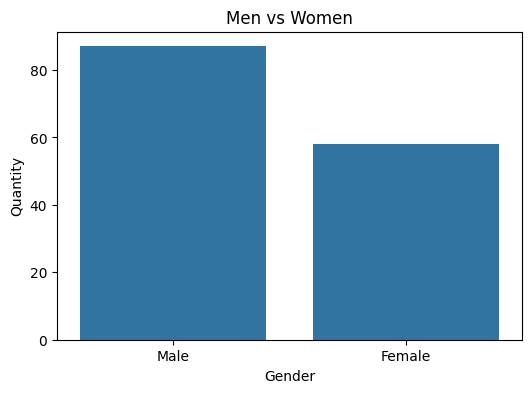

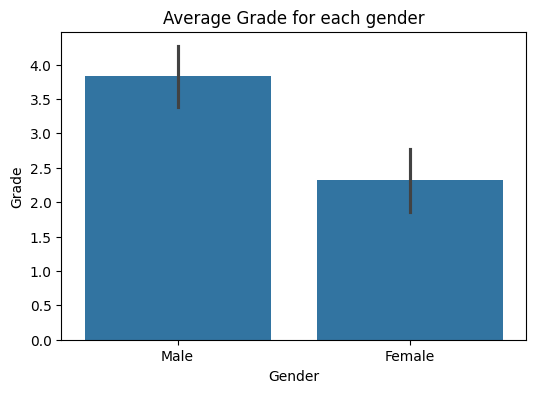

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df)
plt.title('Men vs Women')
plt.xlabel('Gender')
plt.ylabel('Quantity')
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='gender', y='grade', data=df, estimator='mean')
plt.title('Average Grade for each gender')
plt.xlabel('Gender')
plt.ylabel('Grade')
plt.show()

In [ ]:
print(df['mother_edu'].unique())
print(df['father_edu'].unique())

['Primary school' 'Secondary school' 'High school' 'University' 'MSc.'
 'Ph.D.']
['Secondary school' 'High school' 'University' 'MSc.' 'Primary school'
 'Ph.D.']


In [ ]:
high_edu_values = ['University', 'MSc.', 'Ph.D.']

# בדיקה אם לאמא או לאבא יש השכלה גבוהה
df['parent_high_edu'] = df.apply(
    lambda row: (row['mother_edu'] in high_edu_values) or (row['father_edu'] in high_edu_values),
    axis=1
)

# ספירה והצגה
count_high_edu = df['parent_high_edu'].sum()
total_students = len(df)
percent = (count_high_edu / total_students) * 100

print(f"מספר הסטודנטים שלפחות אחד מהוריהם בעל השכלה גבוהה: {count_high_edu} ({percent:.1f}%) מתוך {total_students}")

מספר הסטודנטים שלפחות אחד מהוריהם בעל השכלה גבוהה: 43 (29.7%) מתוך 145


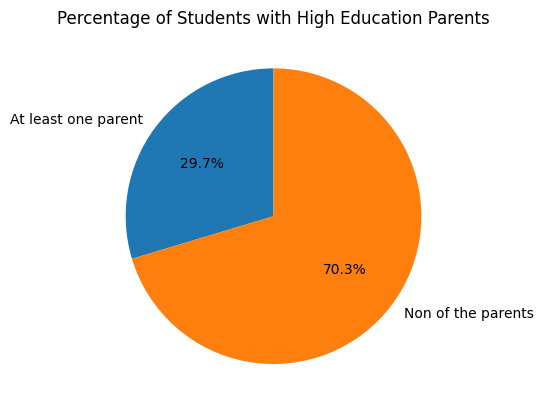

In [ ]:
import matplotlib.pyplot as plt

labels = ['At least one parent', 'Non of the parents']
sizes = [count_high_edu, total_students - count_high_edu]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Students with High Education Parents')
plt.show()

In [ ]:
df = pd.read_csv(output_csv_path)
overall_grade_stats = df['grade'].describe()
grade_stats_by_gender = df.groupby('gender')['grade'].describe()
total_students = np.median(df['grade'])
female_median =np.median(df[df['gender'] == 'Female']['grade'])
male_median = np.median(df[df['gender'] == 'Male']['grade'])
print("Overall Grade Statistics:")
print(overall_grade_stats)
print("\nGrade Statistics by Gender:")
print(grade_stats_by_gender)
print(f"Total Students: {total_students}")
print(f"Female median:{female_median}")
print(f"Male median:{male_median}")

male_fail = len(df[(df['gender'] == 'Male') & (df['grade'] < 60)])
female_fail = len(df[(df['gender'] == 'Female') & (df['grade'] < 60)])
print(f"Number of male students who failed: {male_fail}")
print(f"Number of female students who failed: {female_fail}")

Overall Grade Statistics:
count    145.000000
mean      74.034483
std       17.913920
min       14.000000
25%       64.000000
50%       73.000000
75%       88.000000
max      100.000000
Name: grade, dtype: float64

Grade Statistics by Gender:
        count       mean        std   min   25%   50%   75%    max
gender                                                            
Female   58.0  65.741379  20.708131  14.0  62.0  68.5  78.5   95.0
Male     87.0  79.563218  13.259223  60.0  68.5  76.0  92.0  100.0
Total Students: 73.0
Female median:68.5
Male median:76.0
Number of male students who failed: 0
Number of female students who failed: 8


# Part 3 - Creating Box plots and Violin plotts

DataFrame loaded successfully from: /content/drive/MyDrive/לימודים שנה ב/Project data science/Project_Students_Omri_Nir/Students_correct_data.csv
Column 'grade' already appears to contain continuous scores (0-100). Proceeding.
Column 'attend' is already categorical string. No mapping needed.
Column 'gender' is already categorical string. No mapping needed.

Generating Box Plot for Scores by Attend and Gender...


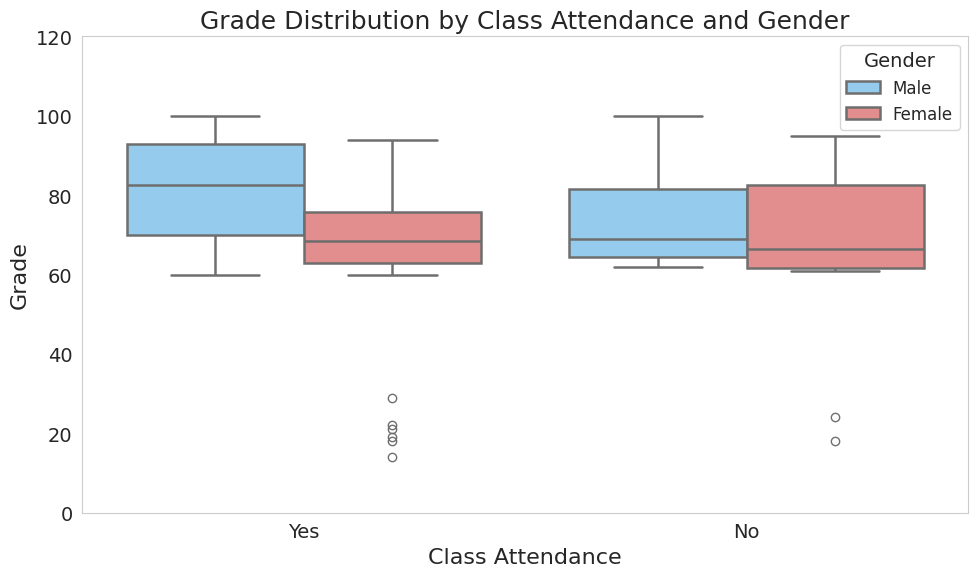

Box Plot generated successfully.

Generating Violin Plot for Scores by Attend and Gender...


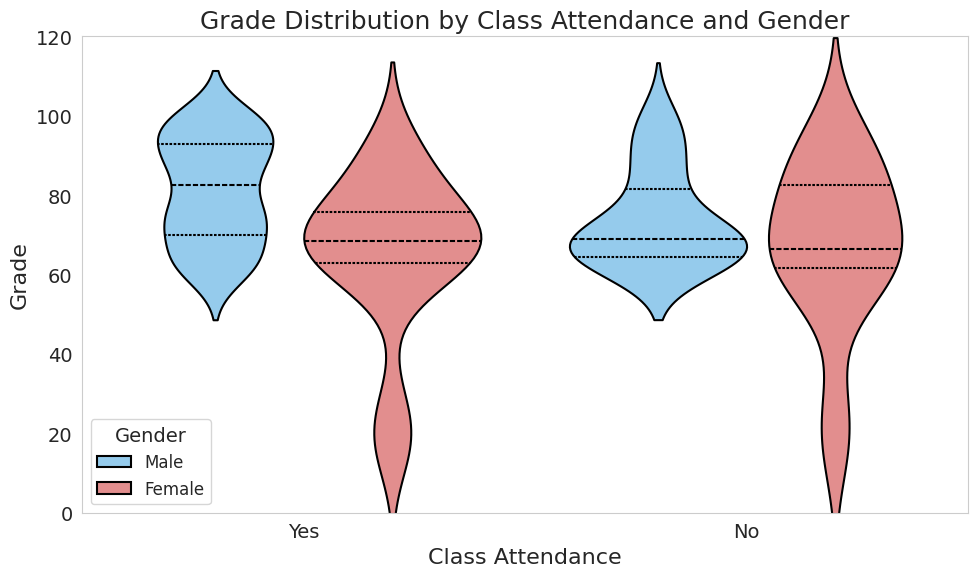

Violin Plot generated successfully.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random # Required for recreating 'grade' column if needed

# Define the path to the processed CSV file

#output_csv_path = ('Students_correct_data.csv')

output_csv_path = '/content/drive/MyDrive/לימודים שנה ב/Project data science/Project_Students_Omri_Nir/Students_correct_data.csv'

# Load the DataFrame
try:
    df = pd.read_csv(output_csv_path)
    print(f"DataFrame loaded successfully from: {output_csv_path}")
    df.columns = [x.lower() for x in df.columns] # Ensure column names are lowercase
except FileNotFoundError:
    print(f"Error: The file '{output_csv_path}' was not found.")
    exit()
except Exception as e:
    print(f"An error occurred during DataFrame loading: {e}")
    exit()

# Data Preparation: Ensure 'grade' is continuous and categorical columns are mapped
if 'grade' in df.columns and df['grade'].max() <= 7 and df['grade'].min() >= 0:
    print("Detected 'grade' column likely contains categorical values (0-7). Recreating continuous scores.")
    grade_ranges_map = {
        0: '0-49', 1: '60-65', 2: '66-71', 3: '72-77',
        4: '78-83', 5: '84-89',
        6: '90-95', 7: '96-100'
    }
    df['temp_grade_range'] = df['grade'].map(grade_ranges_map)

    def generate_random_score(score_range_str):
        if pd.isna(score_range_str): return np.nan
        try:
            min_score, max_score = map(int, score_range_str.split('-'))
            return random.randint(min_score, max_score)
        except ValueError: return np.nan

    df['grade'] = df['temp_grade_range'].apply(generate_random_score)
    df = df.drop(columns=['temp_grade_range'])
    print("Column 'grade' successfully updated with continuous scores (0-100).")
elif 'grade' not in df.columns:
    print("Error: 'grade' column not found. Cannot proceed with plotting.")
    exit()
else:
    print("Column 'grade' already appears to contain continuous scores (0-100). Proceeding.")

# Ensure 'gender' and 'attend' are mapped to string categories
temp_attr_map_for_plot_cols = {
    'attend': {1: 'Yes', 2: 'No'},
    'gender': {1: 'Female', 2: 'Male'}
}

for col_name, mapping in temp_attr_map_for_plot_cols.items():
    if col_name in df.columns and df[col_name].dtype in [np.int64, np.float64]:
        if all(val in mapping for val in df[col_name].dropna().unique()):
            df[col_name] = df[col_name].map(mapping)
            print(f"Column '{col_name}' mapped to string categories for plotting.")
        else:
            print(f"Warning: Column '{col_name}' contains values not in mapping or is already string. Skipping mapping.")
    elif col_name in df.columns and df[col_name].dtype == 'object':
        print(f"Column '{col_name}' is already categorical string. No mapping needed.")
    else:
        print(f"Error: Column '{col_name}' not found for plotting.")

# Global plot settings
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'axes.titlesize': 18,
    'legend.fontsize': 12,
    'legend.title_fontsize': 14
})

# Define the specific categorical column for this plot
plot_col = 'attend'

# Check if required columns exist before plotting
if plot_col in df.columns and 'grade' in df.columns and 'gender' in df.columns:

    # Plot 1: Box Plot for 'grade' vs 'attend' by 'gender'
    print(f"\nGenerating Box Plot for Scores by {plot_col.replace('_', ' ').title()} and Gender...")
    plt.figure(figsize=(10, 6))

    # Define the order for the x-axis categories
    order_attend = ['Yes', 'No']

    # Create the Box Plot
    sns.boxplot(
        data=df,
        x=plot_col,
        y='grade',
        hue='gender', # Separate by gender
        order=order_attend, # Apply the defined order
        palette={'Female': 'lightcoral', 'Male': 'lightskyblue'}, # Specific colors
        linewidth=1.8
    )

    plt.title(f'Grade Distribution by Class Attendance and Gender') # Plot title in English
    plt.xlabel('Class Attendance') # X-axis label in English
    plt.ylabel('Grade') # Y-axis label in English
    plt.grid(False) # Add grid
    plt.ylim(0, 120) # Ensure Y-axis is from 0 to 100
    plt.legend(title='Gender') # Add legend

    plt.tight_layout() # Adjust plot parameters for a tight layout
    plt.show()
    print("Box Plot generated successfully.")

    # Plot 2: Violin Plot for 'grade' vs 'attend' by 'gender'
    print(f"\nGenerating Violin Plot for Scores by {plot_col.replace('_', ' ').title()} and Gender...")
    plt.figure(figsize=(10, 6))

    # Create the Violin Plot
    sns.violinplot(
        data=df,
        x=plot_col,
        y='grade',
        hue='gender', # Separate by gender
        order=order_attend, # Apply the defined order
        palette={'Female': 'lightcoral', 'Male': 'lightskyblue'}, # Specific colors
        inner='quartile', # Show quartiles inside the violin
        linewidth=1.5,
        edgecolor='black'
    )

    plt.title(f'Grade Distribution by Class Attendance and Gender') # Plot title in English
    plt.xlabel('Class Attendance') # X-axis label in English
    plt.ylabel('Grade') # Y-axis label in English
    plt.grid(False) # Add grid
    plt.ylim(0, 120) # Ensure Y-axis is from 0 to 100
    plt.legend(title='Gender') # Add legend

    plt.tight_layout() # Adjust plot parameters for a tight layout
    plt.show()
    print("Violin Plot generated successfully.")

else:
    print(f"Error: Required columns for plotting ('{plot_col}', 'grade', 'gender') not found in DataFrame. Skipping plots.")

DataFrame loaded successfully from: /content/drive/MyDrive/לימודים שנה ב/Project data science/Project_Students_Omri_Nir/Students_correct_data.csv
Column 'grade' already appears to contain continuous scores (0-100). Proceeding.
Column 'study_hrs' is already categorical string. No mapping needed.
Column 'gender' is already categorical string. No mapping needed.

Generating Box Plot for Scores by Study Hrs and Gender...


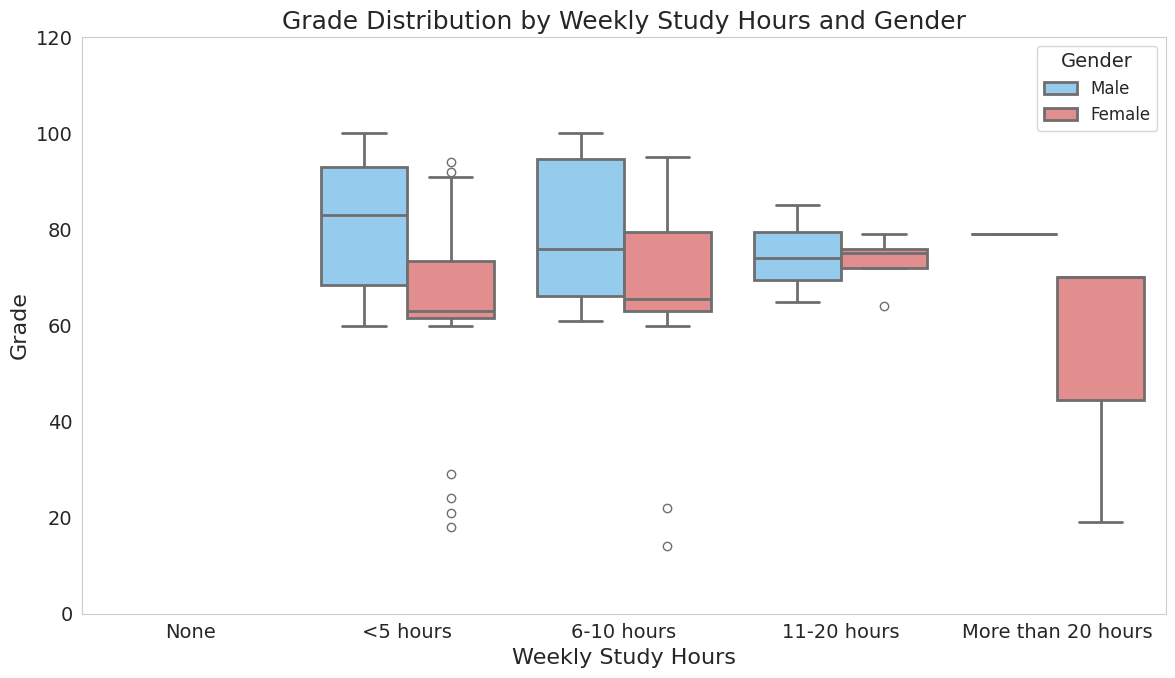

Box Plot generated successfully.

Generating Violin Plot for Scores by Study Hrs and Gender...


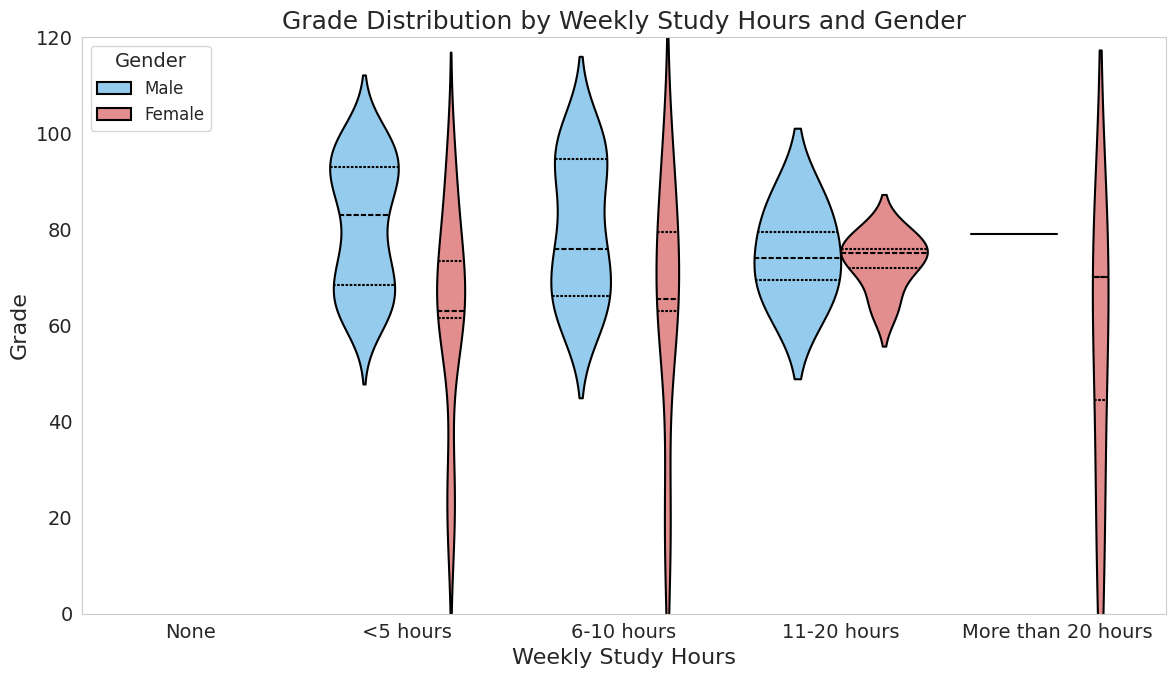

Violin Plot generated successfully.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns # ייבוא ספריית seaborn לגרפים
import matplotlib.pyplot as plt # ייבוא ספריית matplotlib לגרפים
import random # נדרש עבור יצירת עמודת 'grade' אם היא לא קיימת כרציפה

# Define the path to the processed CSV file

#output_csv_path = ('Students_correct_data.csv')

output_csv_path = '/content/drive/MyDrive/לימודים שנה ב/Project data science/Project_Students_Omri_Nir/Students_correct_data.csv'

# Load the DataFrame
try:
    df = pd.read_csv(output_csv_path)
    print(f"DataFrame loaded successfully from: {output_csv_path}")
    df.columns = [x.lower() for x in df.columns] # Ensure column names are lowercase

    # Data Preparation: Ensure 'grade' is continuous and categorical columns are mapped
    grade_ranges_map = {
        0: '0-59', 1: '60-65', 2: '66-71', 3: '72-77',
        4: '78-83', 5: '84-89',
        6: '90-95', 7: '96-100'
    }

    if 'grade' in df.columns and df['grade'].max() <= 7 and df['grade'].min() >= 0:
        print("Detected 'grade' column likely contains categorical values (0-7). Recreating continuous scores.")
        df['temp_grade_range'] = df['grade'].map(grade_ranges_map)

        def generate_random_score(score_range_str):
            if pd.isna(score_range_str): return np.nan
            try:
                min_score, max_score = map(int, score_range_str.split('-'))
                return random.randint(min_score, max_score)
            except ValueError: return np.nan

        df['grade'] = df['temp_grade_range'].apply(generate_random_score)
        df = df.drop(columns=['temp_grade_range'])
        print("Column 'grade' successfully updated with continuous scores (0-100).")
    elif 'grade' not in df.columns:
        print("Error: 'grade' column not found. Cannot proceed with analysis.")
        exit()
    else:
        print("Column 'grade' already appears to contain continuous scores (0-100). Proceeding.")

    # Ensure categorical columns are mapped to strings
    temp_attr_map_for_plot_cols = {
        'study_hrs': {
            1: 'None', 2: '<5 hours', 3: '6-10 hours',
            4: '11-20 hours', 5: 'More than 20 hours'
        },
        'gender': {1: 'Female', 2: 'Male'}
    }

    for col_name, mapping in temp_attr_map_for_plot_cols.items():
        if col_name in df.columns and df[col_name].dtype in [np.int64, np.float64]:
            if all(val in mapping for val in df[col_name].dropna().unique()):
                df[col_name] = df[col_name].map(mapping)
                print(f"Column '{col_name}' mapped to string categories for plotting.")
            else:
                print(f"Warning: Column '{col_name}' contains values not in mapping or is already string. Skipping mapping.")
        elif col_name in df.columns and df[col_name].dtype == 'object':
            print(f"Column '{col_name}' is already categorical string. No mapping needed.")
        else:
            print(f"Error: Column '{col_name}' not found for plotting.")

except FileNotFoundError:
    print(f"Error: The file '{output_csv_path}' was not found.")
    exit()
except Exception as e:
    print(f"An error occurred during DataFrame loading or initial processing: {e}")
    exit()


# Global plot settings
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'axes.titlesize': 18,
    'legend.fontsize': 12,
    'legend.title_fontsize': 14
})

# Define the specific categorical column for this plot
plot_col = 'study_hrs'

# Define the order for the x-axis categories for 'study_hrs'
order_study_hrs = ['None', '<5 hours', '6-10 hours', '11-20 hours', 'More than 20 hours']

# Check if required columns exist before plotting
if plot_col in df.columns and 'grade' in df.columns and 'gender' in df.columns:

    # Plot 1: Box Plot for 'grade' vs 'study_hrs' by 'gender'
    print(f"\nGenerating Box Plot for Scores by {plot_col.replace('_', ' ').title()} and Gender...")
    plt.figure(figsize=(12, 7))

    sns.boxplot(
        data=df,
        x=plot_col,
        y='grade',
        hue='gender', # Separate by gender
        order=order_study_hrs, # Apply the defined order
        palette={'Female': 'lightcoral', 'Male': 'lightskyblue'}, # Specific colors
        linewidth=2.0
    )

    plt.title(f'Grade Distribution by Weekly Study Hours and Gender') # Plot title in English
    plt.xlabel('Weekly Study Hours') # X-axis label in English
    plt.ylabel('Grade') # Y-axis label in English
    plt.grid(False)
    plt.ylim(0, 120) # Ensure Y-axis is from 0 to 100
    plt.legend(title='Gender') # Add legend

    plt.tight_layout() # Adjust plot parameters for a tight layout
    plt.show()
    print("Box Plot generated successfully.")

    # Plot 2: Violin Plot for 'grade' vs 'study_hrs' by 'gender'
    print(f"\nGenerating Violin Plot for Scores by {plot_col.replace('_', ' ').title()} and Gender...")
    plt.figure(figsize=(12, 7))

    sns.violinplot(
        data=df,
        x=plot_col,
        y='grade',
        hue='gender', # Separate by gender
        order=order_study_hrs, # Apply the defined order
        palette={'Female': 'lightcoral', 'Male': 'lightskyblue'}, # Specific colors
        inner='quartile', # Show quartiles inside the violin
        linewidth=1.5,
        edgecolor='black'
    )

    plt.title(f'Grade Distribution by Weekly Study Hours and Gender') # Plot title in English
    plt.xlabel('Weekly Study Hours') # X-axis label in English
    plt.ylabel('Grade') # Y-axis label in English
    plt.ylim(0, 120) # Ensure Y-axis is from 0 to 100
    plt.grid(False) # Removed grid lines
    plt.legend(title='Gender') # Add legend

    plt.tight_layout() # Adjust plot parameters for a tight layout
    plt.show()
    print("Violin Plot generated successfully.")

else:
    print(f"Error: Required columns for plotting ('{plot_col}', 'grade', 'gender') not found in DataFrame. Skipping plots.")

# Part 4 - More Bar Plots + statistical calculations

DataFrame loaded successfully from: /content/drive/MyDrive/לימודים שנה ב/Project data science/Project_Students_Omri_Nir/Students_correct_data.csv
Column 'grade' already appears to contain continuous scores (0-100). Proceeding.
Column 'attend' is already categorical string. No mapping needed.
Column 'listens' is already categorical string. No mapping needed.
Column 'notes' is already categorical string. No mapping needed.
Column 'work' is already categorical string. No mapping needed.
Column 'study_hrs' is already categorical string. No mapping needed.
Column 'gender' is already categorical string. No mapping needed.
p-value for 'attend' = 0.094
p-value for 'listens' = 0.627
p-value for 'notes' = 0.447
p-value for 'work' = 0.085
Filtered 'study_hrs' data to exclude 'None' category for plotting.
p-value for 'study_hrs' = 0.781


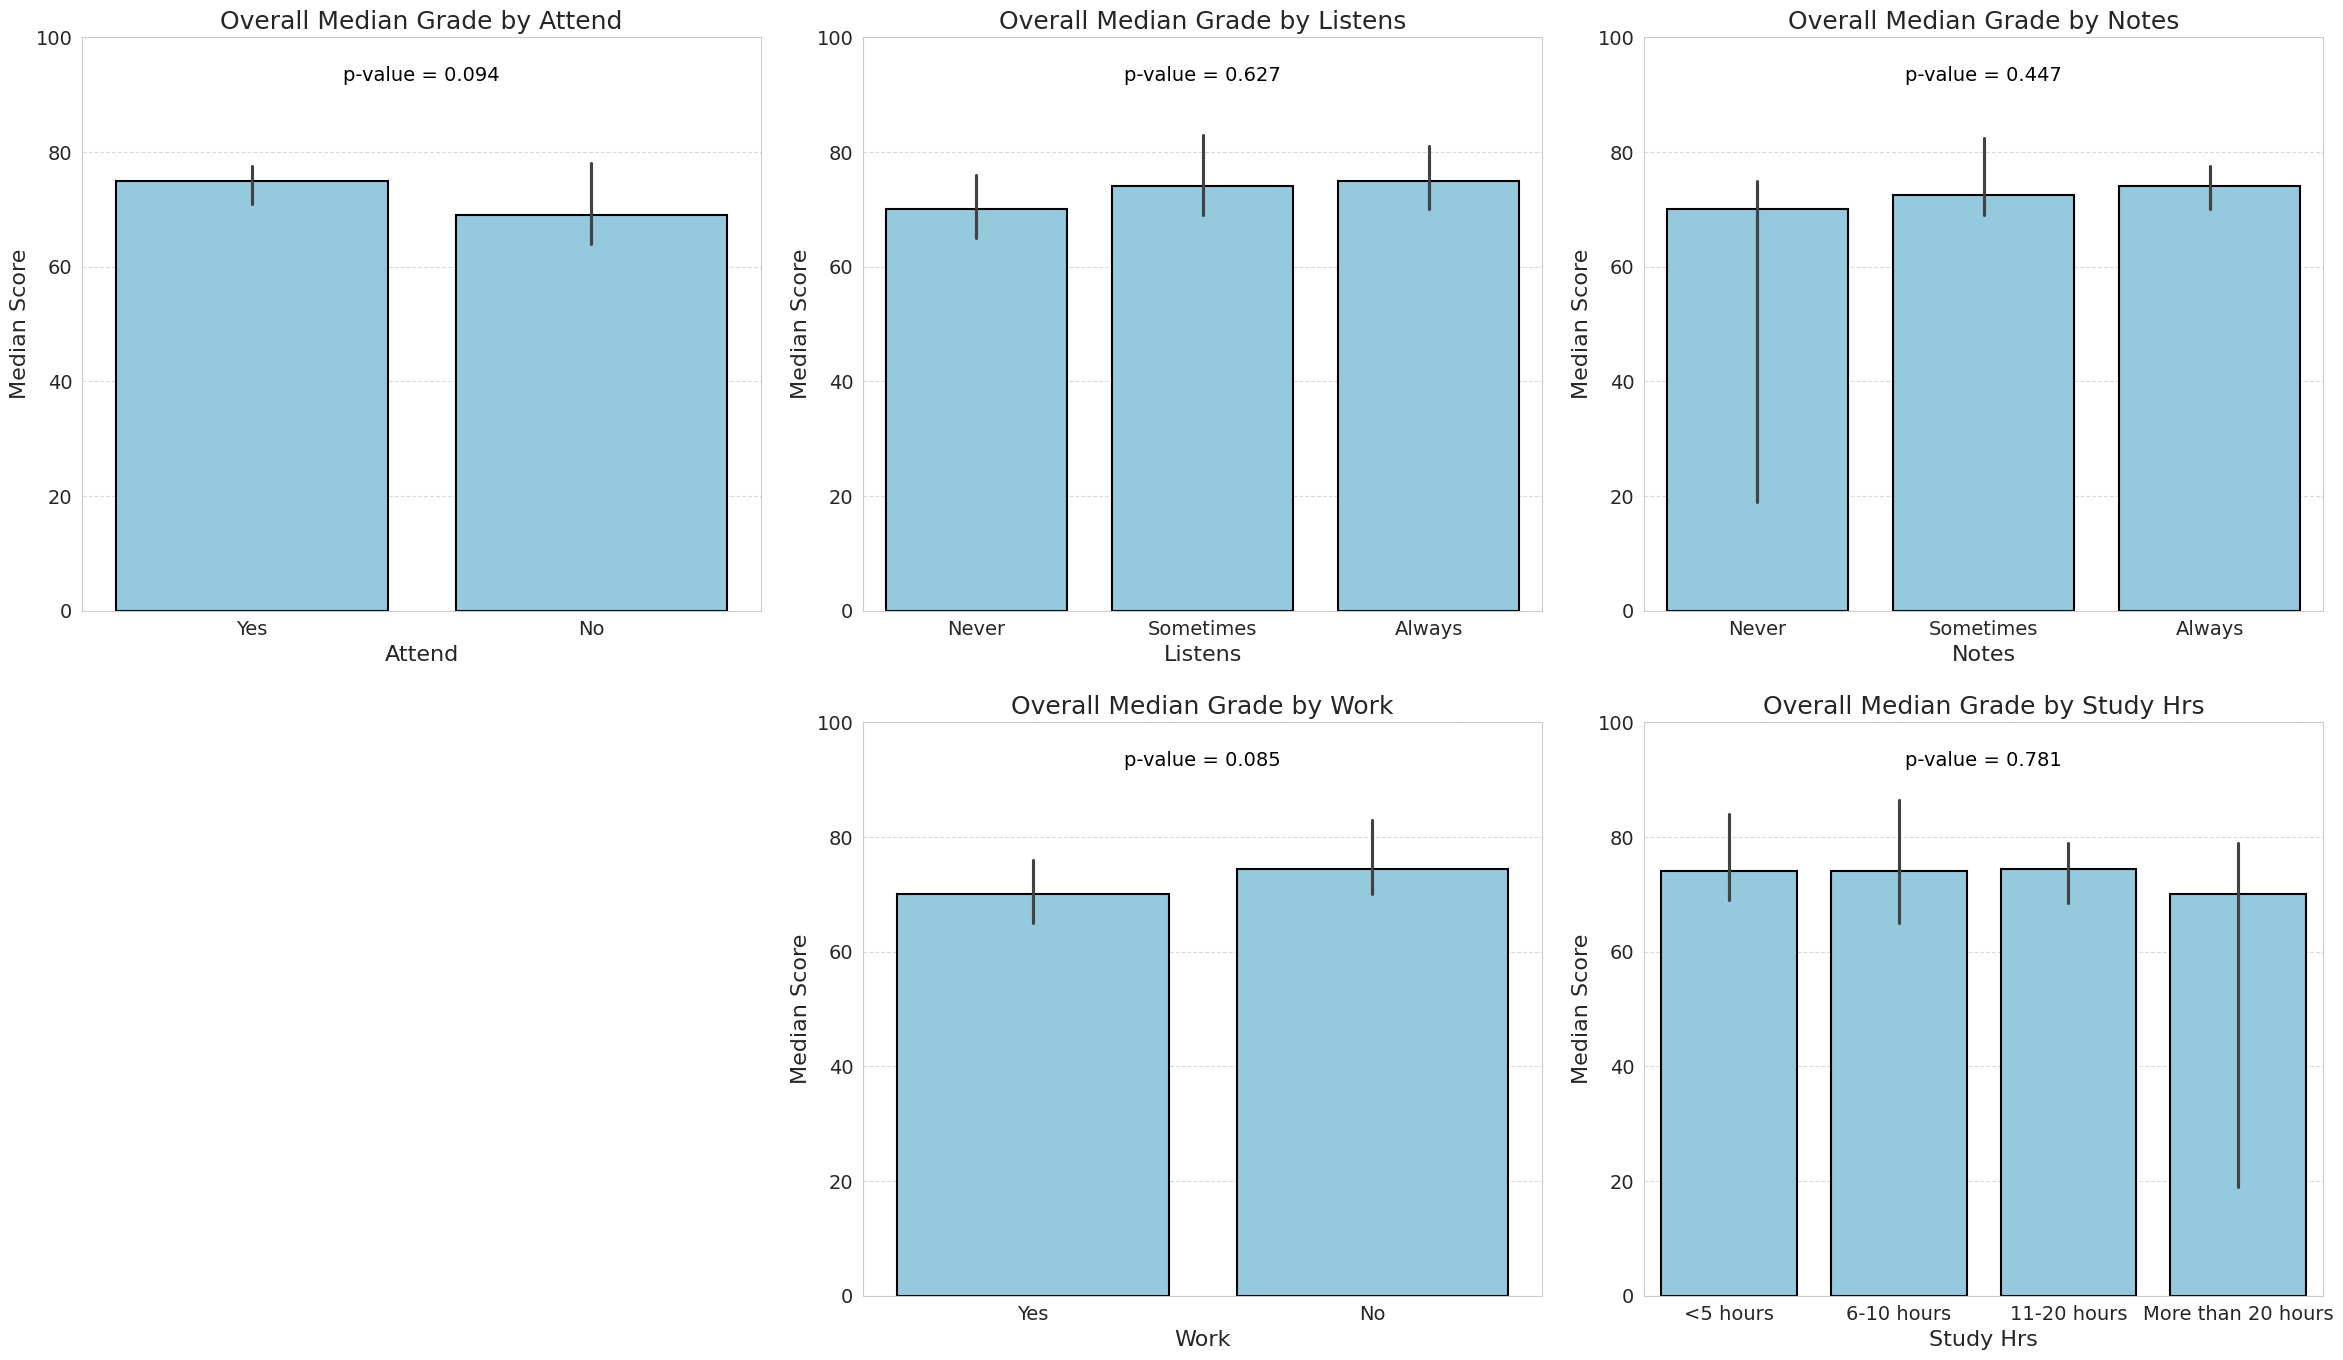

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns # ייבוא ספריית seaborn לגרפים
import matplotlib.pyplot as plt # ייבוא ספריית matplotlib לגרפים
import random # נדרש עבור יצירת עמודת 'grade' אם היא לא קיימת כרציפה
from scipy import stats # ייבוא ספריית סטטיסטיקה לחישוב p-value

# Define the path to the processed CSV file

#output_csv_path = ('Students_correct_data.csv')

output_csv_path = '/content/drive/MyDrive/לימודים שנה ב/Project data science/Project_Students_Omri_Nir/Students_correct_data.csv'

# Load the DataFrame
try:
    df = pd.read_csv(output_csv_path)
    print(f"DataFrame loaded successfully from: {output_csv_path}")
    df.columns = [x.lower() for x in df.columns] # Ensure column names are lowercase

    # Data Preparation: Ensure 'grade' is continuous and categorical columns are mapped
    grade_ranges_map = {
        0: '0-59', 1: '60-65', 2: '66-71', 3: '72-77',
        4: '78-83', 5: '84-89',
        6: '90-95', 7: '96-100'
    }

    if 'grade' in df.columns and df['grade'].max() <= 7 and df['grade'].min() >= 0:
        print("Detected 'grade' column likely contains categorical values (0-7). Recreating continuous scores.")
        df['temp_grade_range'] = df['grade'].map(grade_ranges_map)

        def generate_random_score(score_range_str):
            if pd.isna(score_range_str): return np.nan
            try:
                min_score, max_score = map(int, score_range_str.split('-'))
                return random.randint(min_score, max_score)
            except ValueError: return np.nan

        df['grade'] = df['temp_grade_range'].apply(generate_random_score)
        df = df.drop(columns=['temp_grade_range'])
        print("Column 'grade' successfully updated with continuous scores (0-100).")
    elif 'grade' not in df.columns:
        print("Error: 'grade' column not found. Cannot proceed with analysis.")
        exit()
    else:
        print("Column 'grade' already appears to contain continuous scores (0-100). Proceeding.")

    # Ensure relevant categorical columns are mapped to string categories
    temp_attr_map_for_plot_cols = {
        'attend': {1: 'Yes', 2: 'No'},
        'listens': {1: 'Never', 2: 'Sometimes', 3: 'Always'},
        'notes': {1: 'Never', 2: 'Sometimes', 3: 'Always'},
        'work': {1: 'Yes', 2: 'No'},
        'study_hrs': {
            1: 'None', 2: '<5 hours', 3: '6-10 hours',
            4: '11-20 hours', 5: 'More than 20 hours'
        },
        'gender': {1: 'Female', 2: 'Male'}
    }

    for col_name, mapping in temp_attr_map_for_plot_cols.items():
        if col_name in df.columns and df[col_name].dtype in [np.int64, np.float64]:
            if all(val in mapping for val in df[col_name].dropna().unique()):
                df[col_name] = df[col_name].map(mapping)
                print(f"Column '{col_name}' mapped to string categories for plotting.")
            else:
                print(f"Warning: Column '{col_name}' contains values not in mapping or is already string. Skipping mapping.")
        elif col_name in df.columns and df[col_name].dtype == 'object':
            print(f"Column '{col_name}' is already categorical string. No mapping needed.")
        else:
            print(f"Error: Column '{col_name}' not found for plotting.")

except FileNotFoundError:
    print(f"Error: The file '{output_csv_path}' was not found.")
    exit()
except Exception as e:
    print(f"An error occurred during DataFrame loading or initial processing: {e}")
    exit()


# Plotting Median Scores for learning habits with p-values
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 20,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'axes.titlesize': 18
})

# Define the learning habit columns to plot
learning_habit_cols = ['attend', 'listens', 'notes', 'work', 'study_hrs']

# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 14))

# Map learning_habit_cols to specific axes
plot_axes_map = {
    'attend': axes[0, 0],
    'listens': axes[0, 1],
    'notes': axes[0, 2],
    'work': axes[1, 1],
    'study_hrs': axes[1, 2]
}

# Hide the first subplot in the second row
fig.delaxes(axes[1, 0])


for plot_col in learning_habit_cols:
    ax = plot_axes_map[plot_col]

    if plot_col in df.columns and 'grade' in df.columns and not df['grade'].empty:
        # Filter data for 'study_hrs' to exclude 'None'
        df_plot = df.copy()
        if plot_col == 'study_hrs':
            df_plot = df_plot[df_plot['study_hrs'] != 'None']
            print(f"Filtered 'study_hrs' data to exclude 'None' category for plotting.")

        # Define order for x-axis categories
        current_order = None
        if plot_col in ['attend', 'work']:
            current_order = ['Yes', 'No']
        elif plot_col in ['listens', 'notes']:
            current_order = ['Never', 'Sometimes', 'Always']
        elif plot_col == 'study_hrs':
            current_order = ['<5 hours', '6-10 hours', '11-20 hours', 'More than 20 hours']

        # Create the bar plot for medians
        sns.barplot(
            data=df_plot,
            x=plot_col,
            y='grade',
            estimator=np.median,
            order=current_order,
            color='skyblue',
            edgecolor='black',
            linewidth=1.5,
            ax=ax
        )

        # Calculate and display p-value
        p_value = np.nan

        if plot_col in ['attend', 'work']:
            group_yes_grades = df_plot[df_plot[plot_col] == 'Yes']['grade'].dropna()
            group_no_grades = df_plot[df_plot[plot_col] == 'No']['grade'].dropna()
            if not group_yes_grades.empty and not group_no_grades.empty:
                stat, p_value = stats.mannwhitneyu(group_yes_grades, group_no_grades, alternative="two-sided")
            else:
                print(f"Not enough data in '{plot_col}' groups (Yes/No) to calculate p-value.")
        elif plot_col in ['listens', 'notes', 'study_hrs']:
            grades_groups = [df_plot[df_plot[plot_col] == cat]['grade'].dropna() for cat in current_order if cat in df_plot[plot_col].unique()]

            if len(grades_groups) >= 2 and all(not g.empty for g in grades_groups):
                stat, p_value = stats.kruskal(*grades_groups)
            else:
                print(f"Not enough data in all groups for '{plot_col}' to calculate p-value.")

        # Display p-value on the plot
        if not np.isnan(p_value):
            ax.text(
                0.5,
                0.95,
                f'p-value = {p_value:.3f}',
                horizontalalignment='center',
                verticalalignment='top',
                color='black',
                fontsize=14,
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'),
                transform=ax.transAxes
            )
            print(f"p-value for '{plot_col}' = {p_value:.3f}")
        else:
            print(f"p-value for '{plot_col}' could not be calculated.")

        # Set plot title and labels
        ax.set_title(f'Overall Median Grade by {plot_col.replace("_", " ").title()}')
        ax.set_xlabel(f'{plot_col.replace("_", " ").title()}')
        ax.set_ylabel('Median Score')
        ax.set_ylim(0, 100)
        ax.grid(axis='y', linestyle='--', alpha=0.7)

    else:
        print(f"Error: Required columns for plotting '{plot_col}' not found or 'grade' is empty. Skipping plot for {plot_col}.")

plt.tight_layout()
plt.show()

###  4 a - garde vs working hrs. box plots

DataFrame loaded successfully from: /content/drive/MyDrive/לימודים שנה ב/Project data science/Project_Students_Omri_Nir/Students_correct_data.csv
Column 'grade' already appears to contain continuous scores (0-100). Proceeding.
Column 'work' is already categorical string. No mapping needed.
Column 'gender' is already categorical string. No mapping needed.


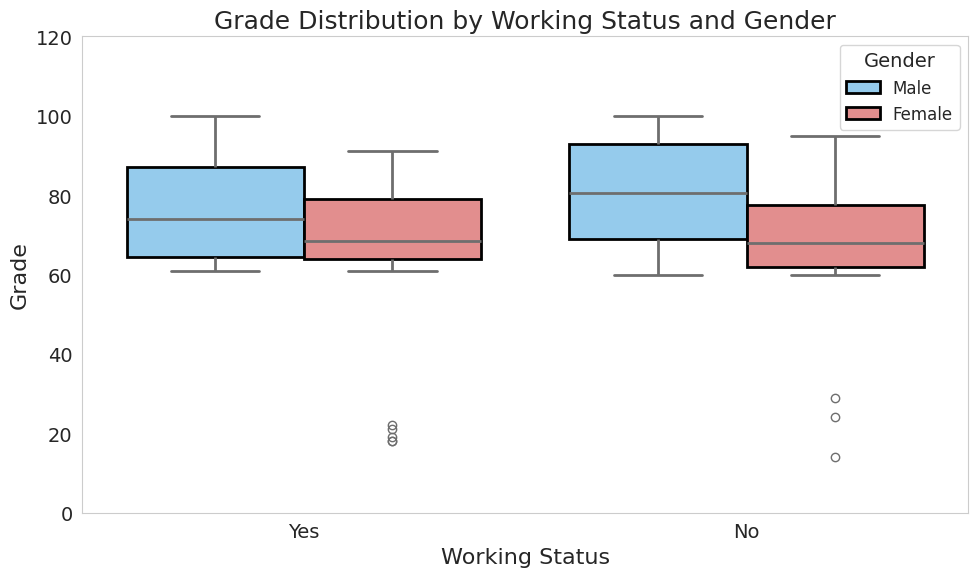

Box Plot for 'work' generated successfully.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns # ייבוא ספריית seaborn לגרפים
import matplotlib.pyplot as plt # ייבוא ספריית matplotlib לגרפים
import random # נדרש עבור יצירת עמודת 'grade' אם היא לא קיימת כרציפה

# Define the path to the processed CSV file

#output_csv_path = ('Students_correct_data.csv')

output_csv_path = '/content/drive/MyDrive/לימודים שנה ב/Project data science/Project_Students_Omri_Nir/Students_correct_data.csv'

# Load the DataFrame
try:
    df = pd.read_csv(output_csv_path)
    print(f"DataFrame loaded successfully from: {output_csv_path}")
    df.columns = [x.lower() for x in df.columns] # Ensure column names are lowercase

    # Data Preparation: Ensure 'grade' is continuous and categorical columns are mapped
    grade_ranges_map = {
        0: '0-59', 1: '60-65', 2: '66-71', 3: '72-77',
        4: '78-83', 5: '84-89',
        6: '90-95', 7: '96-100'
    }

    if 'grade' in df.columns and df['grade'].max() <= 7 and df['grade'].min() >= 0:
        print("Detected 'grade' column likely contains categorical values (0-7). Recreating continuous scores.")
        df['temp_grade_range'] = df['grade'].map(grade_ranges_map)

        def generate_random_score(score_range_str):
            if pd.isna(score_range_str): return np.nan
            try:
                min_score, max_score = map(int, score_range_str.split('-'))
                return random.randint(min_score, max_score)
            except ValueError: return np.nan

        df['grade'] = df['temp_grade_range'].apply(generate_random_score)
        df = df.drop(columns=['temp_grade_range'])
        print("Column 'grade' successfully updated with continuous scores (0-100).")
    elif 'grade' not in df.columns:
        print("Error: 'grade' column not found. Cannot proceed with plotting.")
        exit()
    else:
        print("Column 'grade' already appears to contain continuous scores (0-100). Proceeding.")

    # Ensure 'work' and 'gender' are mapped to string categories
    temp_attr_map_for_plot_cols = {
        'work': {1: 'Yes', 2: 'No'},
        'gender': {1: 'Female', 2: 'Male'}
    }

    for col_name, mapping in temp_attr_map_for_plot_cols.items():
        if col_name in df.columns and df[col_name].dtype in [np.int64, np.float64]:
            if all(val in mapping for val in df[col_name].dropna().unique()):
                df[col_name] = df[col_name].map(mapping)
                print(f"Column '{col_name}' mapped to string categories for plotting.")
            else:
                print(f"Warning: Column '{col_name}' contains values not in mapping or is already string. Skipping mapping.")
        elif col_name in df.columns and df[col_name].dtype == 'object':
            print(f"Column '{col_name}' is already categorical string. No mapping needed.")
        else:
            print(f"Error: Column '{col_name}' not found for plotting.")

except FileNotFoundError:
    print(f"Error: The file '{output_csv_path}' was not found.")
    exit()
except Exception as e:
    print(f"An error occurred during DataFrame loading or initial processing: {e}")
    exit()


# Plotting Box Plot for 'grade' vs 'work' by 'gender'
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'axes.titlesize': 18,
    'legend.fontsize': 12,
    'legend.title_fontsize': 14
})

plot_col = 'work'

# Check if required columns exist before plotting
if plot_col in df.columns and 'grade' in df.columns and 'gender' in df.columns:
    plt.figure(figsize=(10, 6))

    # Define the order for the x-axis categories
    order_work = ['Yes', 'No']

    # Create the Box Plot
    sns.boxplot(
        data=df,
        x=plot_col,
        y='grade',
        hue='gender', # Separate by gender
        order=order_work, # Apply the defined order
        palette={'Female': 'lightcoral', 'Male': 'lightskyblue'}, # Specific colors
        linewidth=2.0,
        boxprops=dict(edgecolor='black'),
    )

    plt.title(f'Grade Distribution by Working Status and Gender') # Plot title in English
    plt.xlabel('Working Status') # X-axis label in English
    plt.ylabel('Grade') # Y-axis label in English
    plt.grid(False)
    plt.ylim(0, 120)
    plt.legend(title='Gender')

    plt.tight_layout()
    plt.show()
    print("Box Plot for 'work' generated successfully.")

else:
    print(f"Error: Required columns for plotting ('{plot_col}', 'grade', 'gender') not found in DataFrame. Skipping plot.")

### 4 b- box plot parental education

DataFrame loaded successfully from: /content/drive/MyDrive/לימודים שנה ב/Project data science/Project_Students_Omri_Nir/Students_correct_data.csv
Column 'grade' already appears to contain continuous grades (0-100). Proceeding.
Column 'mother_edu' is already categorical string. No mapping needed.
Column 'father_edu' is already categorical string. No mapping needed.

Creating Parental Education Groups...

Sample Sizes for Each Parental Education Group:
parental_education_group
Both High Education         16
Both Low Education         102
Father High, Mother Low     18
Mother High, Father Low      9
Name: count, dtype: int64

Generating Box Plot for Grade Distribution by Parental Education Group...


<ipython-input-84-9b4c7499e63c>:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


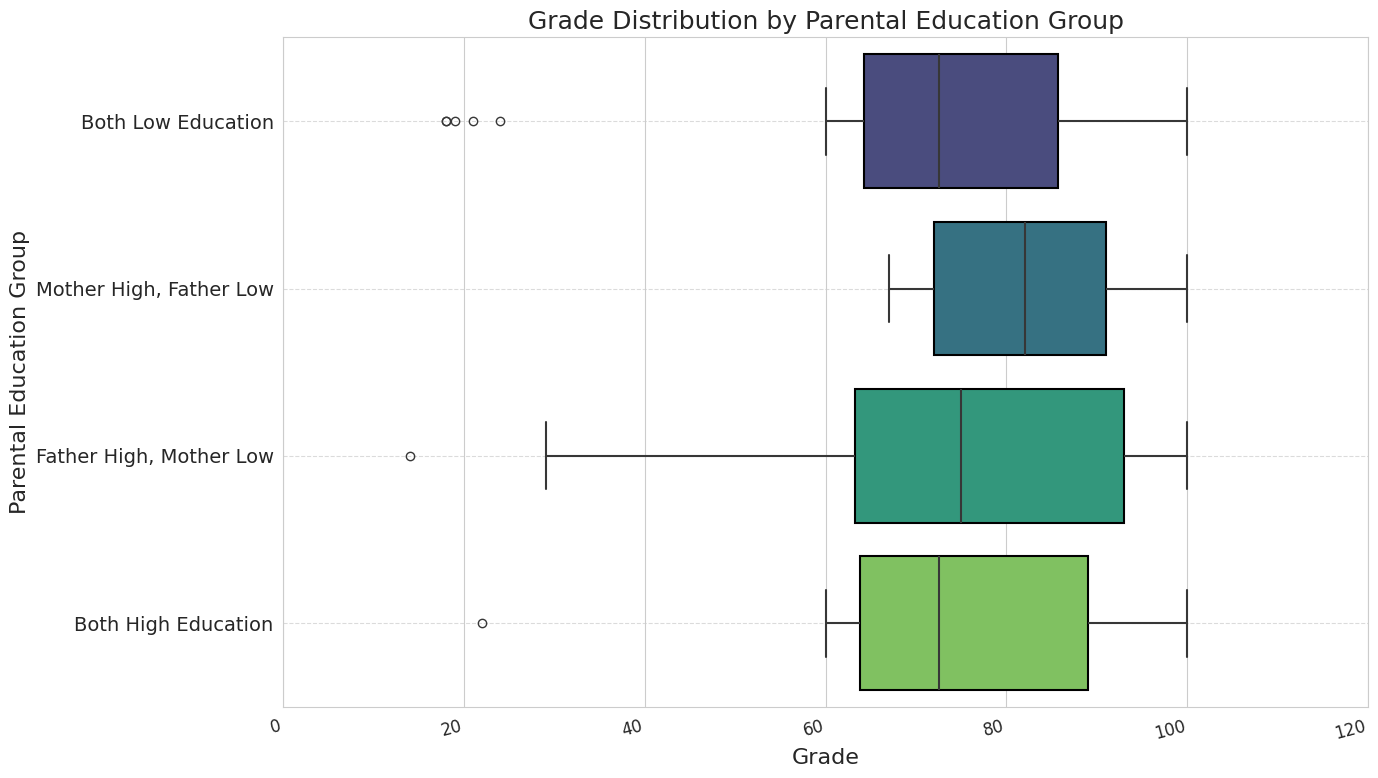

Box Plot for Parental Education Group generated successfully.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random # Required for recreating 'grade' column if needed
from matplotlib.colors import LinearSegmentedColormap # ייבוא ליצירת מפת צבעים מותאמת אישית

# Define the path to the processed CSV file

#output_csv_path = ('Students_correct_data.csv')

output_csv_path = '/content/drive/MyDrive/לימודים שנה ב/Project data science/Project_Students_Omri_Nir/Students_correct_data.csv'

# Load the DataFrame
try:
    df = pd.read_csv(output_csv_path)
    print(f"DataFrame loaded successfully from: {output_csv_path}")
    df.columns = [x.lower() for x in df.columns] # Ensure column names are lowercase
except FileNotFoundError:
    print(f"Error: The file '{output_csv_path}' was not found.")
    exit()
except Exception as e:
    print(f"An error occurred during DataFrame loading: {e}")
    exit()

# Data Preparation: Ensure 'grade' is continuous and education columns are mapped
grade_ranges_map = {
    0: '0-59', 1: '60-65', 2: '66-71', 3: '72-77',
    4: '78-83', 5: '84-89',
    6: '90-95', 7: '96-100'
}

if 'grade' in df.columns and df['grade'].max() <= 7 and df['grade'].min() >= 0:
    print("Detected 'grade' column likely contains categorical values (0-7). Recreating continuous grades.")
    df['temp_grade_range'] = df['grade'].map(grade_ranges_map)

    def generate_random_grade(grade_range_str):
        if pd.isna(grade_range_str): return np.nan
        try:
            min_grade, max_grade = map(int, grade_range_str.split('-'))
            return random.randint(min_score, max_score)
        except ValueError: return np.nan

    df['grade'] = df['temp_grade_range'].apply(generate_random_grade)
    df = df.drop(columns=['temp_grade_range'])
    print("Column 'grade' successfully updated with continuous grades (0-100).")
elif 'grade' not in df.columns:
    print("Error: 'grade' column not found. Cannot proceed with analysis.")
    exit()
else:
    print("Column 'grade' already appears to contain continuous grades (0-100). Proceeding.")

# Define mappings for education levels
edu_map = {
    1: 'Primary school',
    2: 'Secondary school',
    3: 'High school',
    4: 'University',
    5: 'MSc.',
    6: 'Ph.D.'
}

# Ensure 'mother_edu' and 'father_edu' are mapped to string categories
for col_name in ['mother_edu', 'father_edu']:
    if col_name in df.columns and df[col_name].dtype in [np.int64, np.float64]:
        if all(val in edu_map for val in df[col_name].dropna().unique()):
            df[col_name] = df[col_name].map(edu_map)
            print(f"Column '{col_name}' mapped to string categories for heatmap.")
        else:
            print(f"Warning: Column '{col_name}' contains values not in mapping or is already string. Skipping mapping.")
    elif col_name in df.columns and df[col_name].dtype == 'object':
        print(f"Column '{col_name}' is already categorical string. No mapping needed.")
    else:
        print(f"Error: Column '{col_name}' not found for heatmap.")

# Define the desired order for education levels
education_order = [
    'Primary school',
    'Secondary school',
    'High school',
    'University',
    'MSc.',
    'Ph.D.'
]

# Create Parental Education Groups
print("\nCreating Parental Education Groups...")

high_education_levels = ['University', 'MSc.', 'Ph.D.']

df['is_mother_high_edu'] = df['mother_edu'].isin(high_education_levels)
df['is_father_high_edu'] = df['father_edu'].isin(high_education_levels)

def categorize_parental_education(row):
    if row['is_mother_high_edu'] and not row['is_father_high_edu']:
        return 'Mother High, Father Low'
    elif not row['is_mother_high_edu'] and row['is_father_high_edu']:
        return 'Father High, Mother Low'
    elif not row['is_mother_high_edu'] and not row['is_father_high_edu']:
        return 'Both Low Education'
    elif row['is_mother_high_edu'] and row['is_father_high_edu']:
        return 'Both High Education'
    else:
        return 'Undefined'

df['parental_education_group'] = df.apply(categorize_parental_education, axis=1)

# Calculate Sample Size for Each Group
print("\nSample Sizes for Each Parental Education Group:")
group_counts = df['parental_education_group'].value_counts().sort_index()
print(group_counts)

# Plotting Grade Distribution by Parental Education Group (Box Plot)
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 14,
    'axes.titlesize': 18,
    'legend.fontsize': 12,
    'legend.title_fontsize': 14
})

print("\nGenerating Box Plot for Grade Distribution by Parental Education Group...")

if 'parental_education_group' in df.columns and 'grade' in df.columns and not df['grade'].empty:
    plt.figure(figsize=(14, 8))

    group_order = [
        'Both Low Education',
        'Mother High, Father Low',
        'Father High, Mother Low',
        'Both High Education'
    ]

    sns.boxplot(
        data=df,
        y='parental_education_group',
        x='grade',
        order=group_order,
        palette='viridis',
        linewidth=1.5,
        boxprops=dict(edgecolor='black'),
    )

    plt.title('Grade Distribution by Parental Education Group')
    plt.ylabel('Parental Education Group')
    plt.xlabel('Grade')
    plt.xlim(0, 120)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.xticks(rotation=15, ha='right')

    plt.tight_layout()
    plt.show()
    print("Box Plot for Parental Education Group generated successfully.")
else:
    print("Error: 'parental_education_group' or 'grade' column not found or is empty. Cannot generate plot.")

### 4 c - Median Parental edu. heat map

DataFrame loaded successfully from: /content/drive/MyDrive/לימודים שנה ב/Project data science/Project_Students_Omri_Nir/Students_correct_data.csv
Column 'grade' already appears to contain continuous grades (0-100). Proceeding.
Column 'mother_edu' is already categorical string. No mapping needed.
Column 'father_edu' is already categorical string. No mapping needed.

Generating Heatmap for Median Grades by Parental Education...


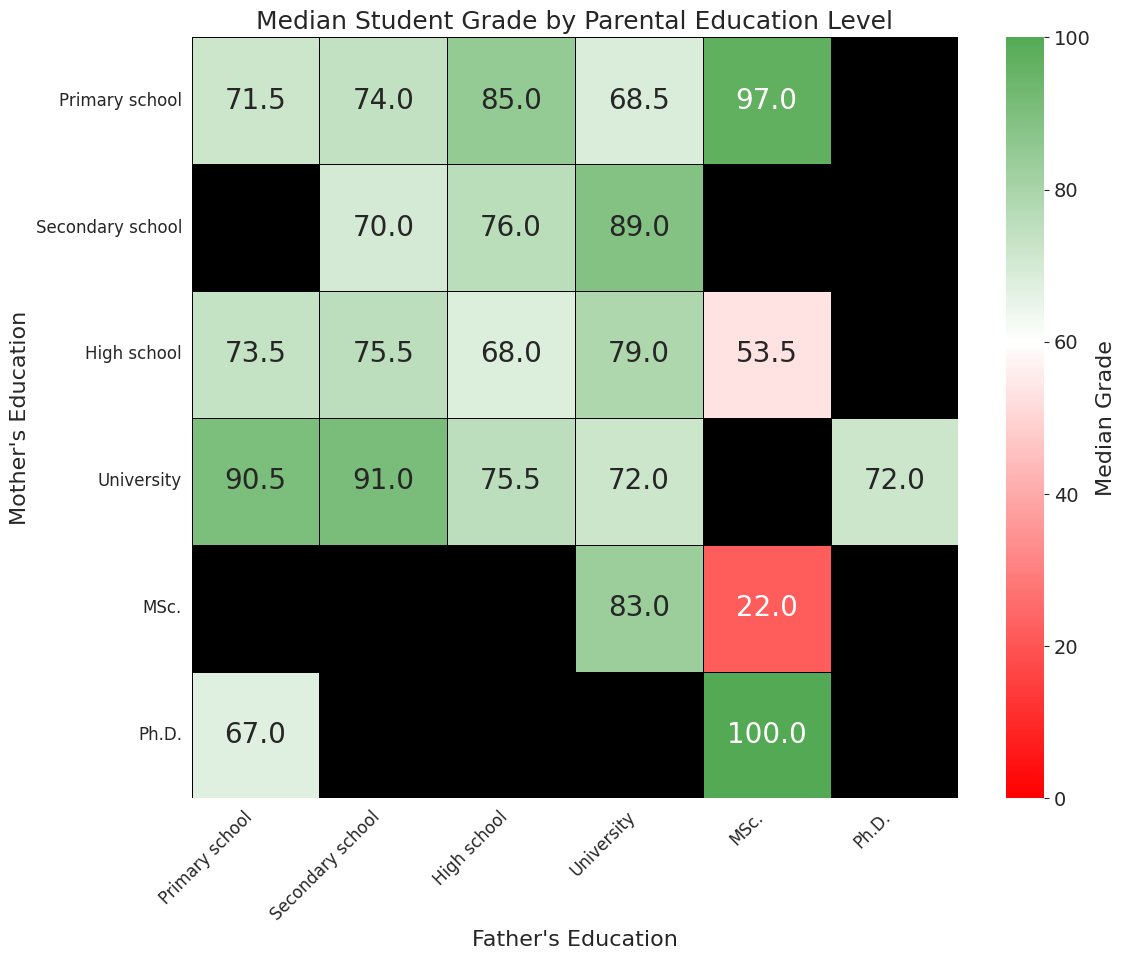

Heatmap generated successfully.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random # Required for recreating 'grade' column if needed
from matplotlib.colors import LinearSegmentedColormap # ייבוא ליצירת מפת צבעים מותאמת אישית

# Define the path to the processed CSV file

#output_csv_path = ('Students_correct_data.csv')

output_csv_path = '/content/drive/MyDrive/לימודים שנה ב/Project data science/Project_Students_Omri_Nir/Students_correct_data.csv'

# Load the DataFrame from the saved CSV file
try:
    df = pd.read_csv(output_csv_path)
    print(f"DataFrame loaded successfully from: {output_csv_path}")
    df.columns = [x.lower() for x in df.columns] # Ensure column names are lowercase
except FileNotFoundError:
    print(f"Error: The file '{output_csv_path}' was not found. Please ensure it exists and contains the processed data.")
    exit()
except Exception as e:
    print(f"An error occurred during DataFrame loading: {e}")
    exit()

# --- Data Preparation: Ensure 'grade' is continuous and education columns are mapped ---
# This block ensures 'grade' column contains continuous grades (0-100)
# and 'mother_edu' and 'father_edu' are mapped to string categories.

# Define the mapping of numerical grades (0-7) to grade ranges
grade_ranges_map = {
    0: '0-59', 1: '60-65', 2: '66-71', 3: '72-77',
    4: '78-83', 5: '84-89', # Corrected from '89-84'
    6: '90-95', 7: '96-100'
}

# Check if 'grade' column exists and if its max value is <= 7 (indicating it's still categorical)
if 'grade' in df.columns and df['grade'].max() <= 7 and df['grade'].min() >= 0:
    print("Detected 'grade' column likely contains categorical values (0-7). Recreating continuous grades.")
    df['temp_grade_range'] = df['grade'].map(grade_ranges_map)

    def generate_random_grade(grade_range_str):
        if pd.isna(grade_range_str): return np.nan
        try:
            min_grade, max_grade = map(int, grade_range_str.split('-'))
            return random.randint(min_grade, max_grade)
        except ValueError: return np.nan

    df['grade'] = df['temp_grade_range'].apply(generate_random_grade)
    df = df.drop(columns=['temp_grade_range'])
    print("Column 'grade' successfully updated with continuous grades (0-100).")
elif 'grade' not in df.columns:
    print("Error: 'grade' column not found. Cannot proceed with heatmap generation.")
    exit()
else:
    print("Column 'grade' already appears to contain continuous grades (0-100). Proceeding.")

# Define mappings for education levels based on original attr_map
edu_map = {
    1: 'Primary school',
    2: 'Secondary school',
    3: 'High school',
    4: 'University',
    5: 'MSc.',
    6: 'Ph.D.'
}

# Ensure 'mother_edu' and 'father_edu' are mapped to string categories
for col_name in ['mother_edu', 'father_edu']:
    if col_name in df.columns and df[col_name].dtype in [np.int64, np.float64]:
        if all(val in edu_map for val in df[col_name].dropna().unique()):
            df[col_name] = df[col_name].map(edu_map)
            print(f"Column '{col_name}' mapped to string categories for heatmap.")
        else:
            print(f"Warning: Column '{col_name}' contains values not in mapping or is already string. Skipping mapping.")
    elif col_name in df.columns and df[col_name].dtype == 'object':
        print(f"Column '{col_name}' is already categorical string. No mapping needed.")
    else:
        print(f"Error: Column '{col_name}' not found for heatmap.")

# Define the desired order for education levels on the heatmap axes
education_order = [
    'Primary school',
    'Secondary school',
    'High school',
    'University',
    'MSc.',
    'Ph.D.'
]

# --- Calculate Median Grades for Heatmap ---
# Group by mother's education and father's education, then calculate the median grade
# The .unstack() method pivots the 'father_edu' values into columns
median_grades_heatmap = df.groupby(['mother_edu', 'father_edu'])['grade'].median().unstack()

# Reindex the DataFrame to ensure the desired order for rows and columns
median_grades_heatmap = median_grades_heatmap.reindex(index=education_order, columns=education_order)

# --- Create the Heatmap ---
print("\nGenerating Heatmap for Median Grades by Parental Education...")

if not median_grades_heatmap.empty:
    plt.figure(figsize=(12, 10)) # Set figure size for the heatmap

    # --- Custom Colormap Definition ---
    # Define colors for the diverging colormap: red for low, white at 60, green for high
    colors = ["red", "white", "green"]
    # Create the colormap
    # 'pos' defines the normalized positions (0 to 1) for each color
    # 0.60 corresponds to grade 60 on a 0-100 scale
    cmap_custom = LinearSegmentedColormap.from_list("custom_red_white_green", colors, N=256)

    # Set 'bad' values (NaNs) to black for the custom colormap
    cmap_custom.set_bad('black')
    # --- End Custom Colormap Definition ---

    sns.heatmap(
        median_grades_heatmap,
        annot=True,      # Show the median values on the heatmap cells
        fmt=".1f",       # Format annotations to one decimal place
        cmap=cmap_custom, # Use the custom colormap
        center=60,       # Center the colormap around 60 (white will be at 60)
        vmin=0,          # Set the minimum value for the colormap scale
        vmax=100,        # Set the maximum value for the colormap scale
        linewidths=.5,   # Add lines between cells
        linecolor='black', # Color of the lines between cells
        cbar_kws={'label': 'Median Grade'} # Label for the color bar (changed to Grade)
    )

    plt.title('Median Student Grade by Parental Education Level', fontsize=18) # Title in English (changed to Grade)
    plt.xlabel('Father\'s Education', fontsize=16) # X-axis label in English
    plt.ylabel('Mother\'s Education', fontsize=16) # Y-axis label in English
    plt.xticks(fontsize=12, rotation=45, ha='right') # Rotate x-axis labels for readability
    plt.yticks(fontsize=12, rotation=0) # Ensure y-axis labels are horizontal

    plt.tight_layout() # Adjust plot parameters for a tight layout
    plt.show()
    print("Heatmap generated successfully.")
else:
    print("Error: Median grades DataFrame is empty. Cannot generate heatmap.")


# Part 5 - Few Reggression model trials and compare

### 5 a - re naming columns

In [ ]:
import pandas as pd

# ================================
# QUICK COLUMN RENAME - SIMPLE VERSION
# ================================

# 1. Load your data

#file_path = ('Students_correct_data.csv')

file_path = '/content/drive/MyDrive/לימודים שנה ב/Project data science/Project_Students_Omri_Nir/Students_correct_data.csv'  # 🔥 CHANGE THIS!
df = pd.read_csv(file_path)

print(f"📊 Loaded data: {df.shape}")
print(f"📋 Current columns: {list(df.columns)}")

# 2. Define your renames
# 🔥 CHANGE THESE TO YOUR ACTUAL COLUMN NAMES:
rename_map = {
    'attend_dept': 'attendance department',
    'prep_exam': 'preparation exam taken',
    'mother_job': 'mother occupation',
    'father_job': 'father occupation',
    'hs_type': 'high_school_type',
    'study_hrs': 'study hours per week',
    'cuml_gpa': 'cumulative gpa',
    'work' : 'working?',
    'partner' : 'in relationship?',
    'father_edu' : 'father education',
    'mother_edu' : 'mother education',
    'read_freq' : 'reading frequency',
    'listens': 'listens in class',
    'likes_discuss': 'likes to discuss',
    'prep_exam': 'preparation for exam',
    'impact': 'homework preparation',
    'read_freq_sci': 'reading frequency in science',
    'attend': 'attend to classes',
    '#_siblings': 'student number of siblings',
    'living': 'place of living',
    # Add more here:
    # 'old_name': 'new_clear_name',
}

# 3. Show what will be renamed
print(f"\n📝 Will rename:")
for old, new in rename_map.items():
    if old in df.columns:
        print(f"  ✅ '{old}' → '{new}'")
    else:
        print(f"  ❌ '{old}' (not found)")

# 4. Apply renames
df_renamed = df.rename(columns=rename_map)

print(f"\n📋 New columns: {list(df_renamed.columns)}")

# 5. Save options - CHOOSE ONE:

# Option A: Overwrite original file
df_renamed.to_csv(file_path, index=False)
print(f"✅ Saved to original file: {file_path}")

# Option B: Save as new file (uncomment next 2 lines, comment above 2 lines)
# df_renamed.to_csv('data_renamed.csv', index=False)
# print(f"✅ Saved as new file: data_renamed.csv")

# Option C: Create backup first (uncomment next 4 lines, comment Option A)
# df.to_csv('backup_original.csv', index=False)  # Create backup
# df_renamed.to_csv(file_path, index=False)       # Save renamed
# print(f"✅ Backup created: backup_original.csv")
# print(f"✅ Renamed file saved: {file_path}")

print(f"🎉 Done! Columns renamed successfully.")

📊 Loaded data: (145, 35)
📋 Current columns: ['studentid', 'age', 'gender', 'high_school_type', 'scholarship', 'working?', 'activity', 'in relationship?', 'salary', 'transport', 'living', 'mother_education', 'father_education', '#_siblings', 'kids', 'mother_occupation', 'father_occupation', 'study_hours_per_week', 'reading_frequency', 'reading frequency in science', 'attendance_department', 'homework preparation', 'attend to classes', 'prep_study', 'preparation for exam', 'notes', 'listens in class', 'likes_discuss', 'classroom', 'cumulative gpa', 'exp_gpa', 'course id', 'ordinal_grade', 'ordinal_grade_range', 'grade']

📝 Will rename:
  ❌ 'attend_dept' (not found)
  ❌ 'prep_exam' (not found)
  ❌ 'mother_job' (not found)
  ❌ 'father_job' (not found)
  ❌ 'hs_type' (not found)
  ❌ 'study_hrs' (not found)
  ❌ 'cuml_gpa' (not found)
  ❌ 'work' (not found)
  ❌ 'partner' (not found)
  ❌ 'father_edu' (not found)
  ❌ 'mother_edu' (not found)
  ❌ 'read_freq' (not found)
  ❌ 'listens' (not found)


### 5 b - Running 2 models for best result - linear regression & lasso

🚀 COMPLETE VARIABLE ANALYSIS
📁 Data file: /content/drive/MyDrive/לימודים שנה ב/Project data science/Project_Students_Omri_Nir/Students_correct_data.csv
🎯 Target: ordinal_grade
🗑️ Removing: ['grade', 'ordinal_grade_range', 'studentid', 'age', 'classroom', 'course id', 'attend_dept', 'kids']
📊 Normalization: standard
🎛️ Alpha range: low
📏 Min coefficient: 0.01

--- STEP 1: Loading and Cleaning Data ---
✅ Data loaded successfully: (145, 35)
📋 Available columns: ['studentid', 'age', 'gender', 'high_school_type', 'scholarship', 'working?', 'activity', 'in relationship?', 'salary', 'transport', 'place of living', 'mother_education', 'father_education', 'student number of siblings', 'kids', 'mother_occupation', 'father_occupation', 'study_hours_per_week', 'reading_frequency', 'reading frequency in science', 'attendance_department', 'homework preparation', 'attend to classes', 'prep_study', 'preparation for exam', 'notes', 'listens in class', 'likes to discuss', 'classroom', 'cumulative gpa', 

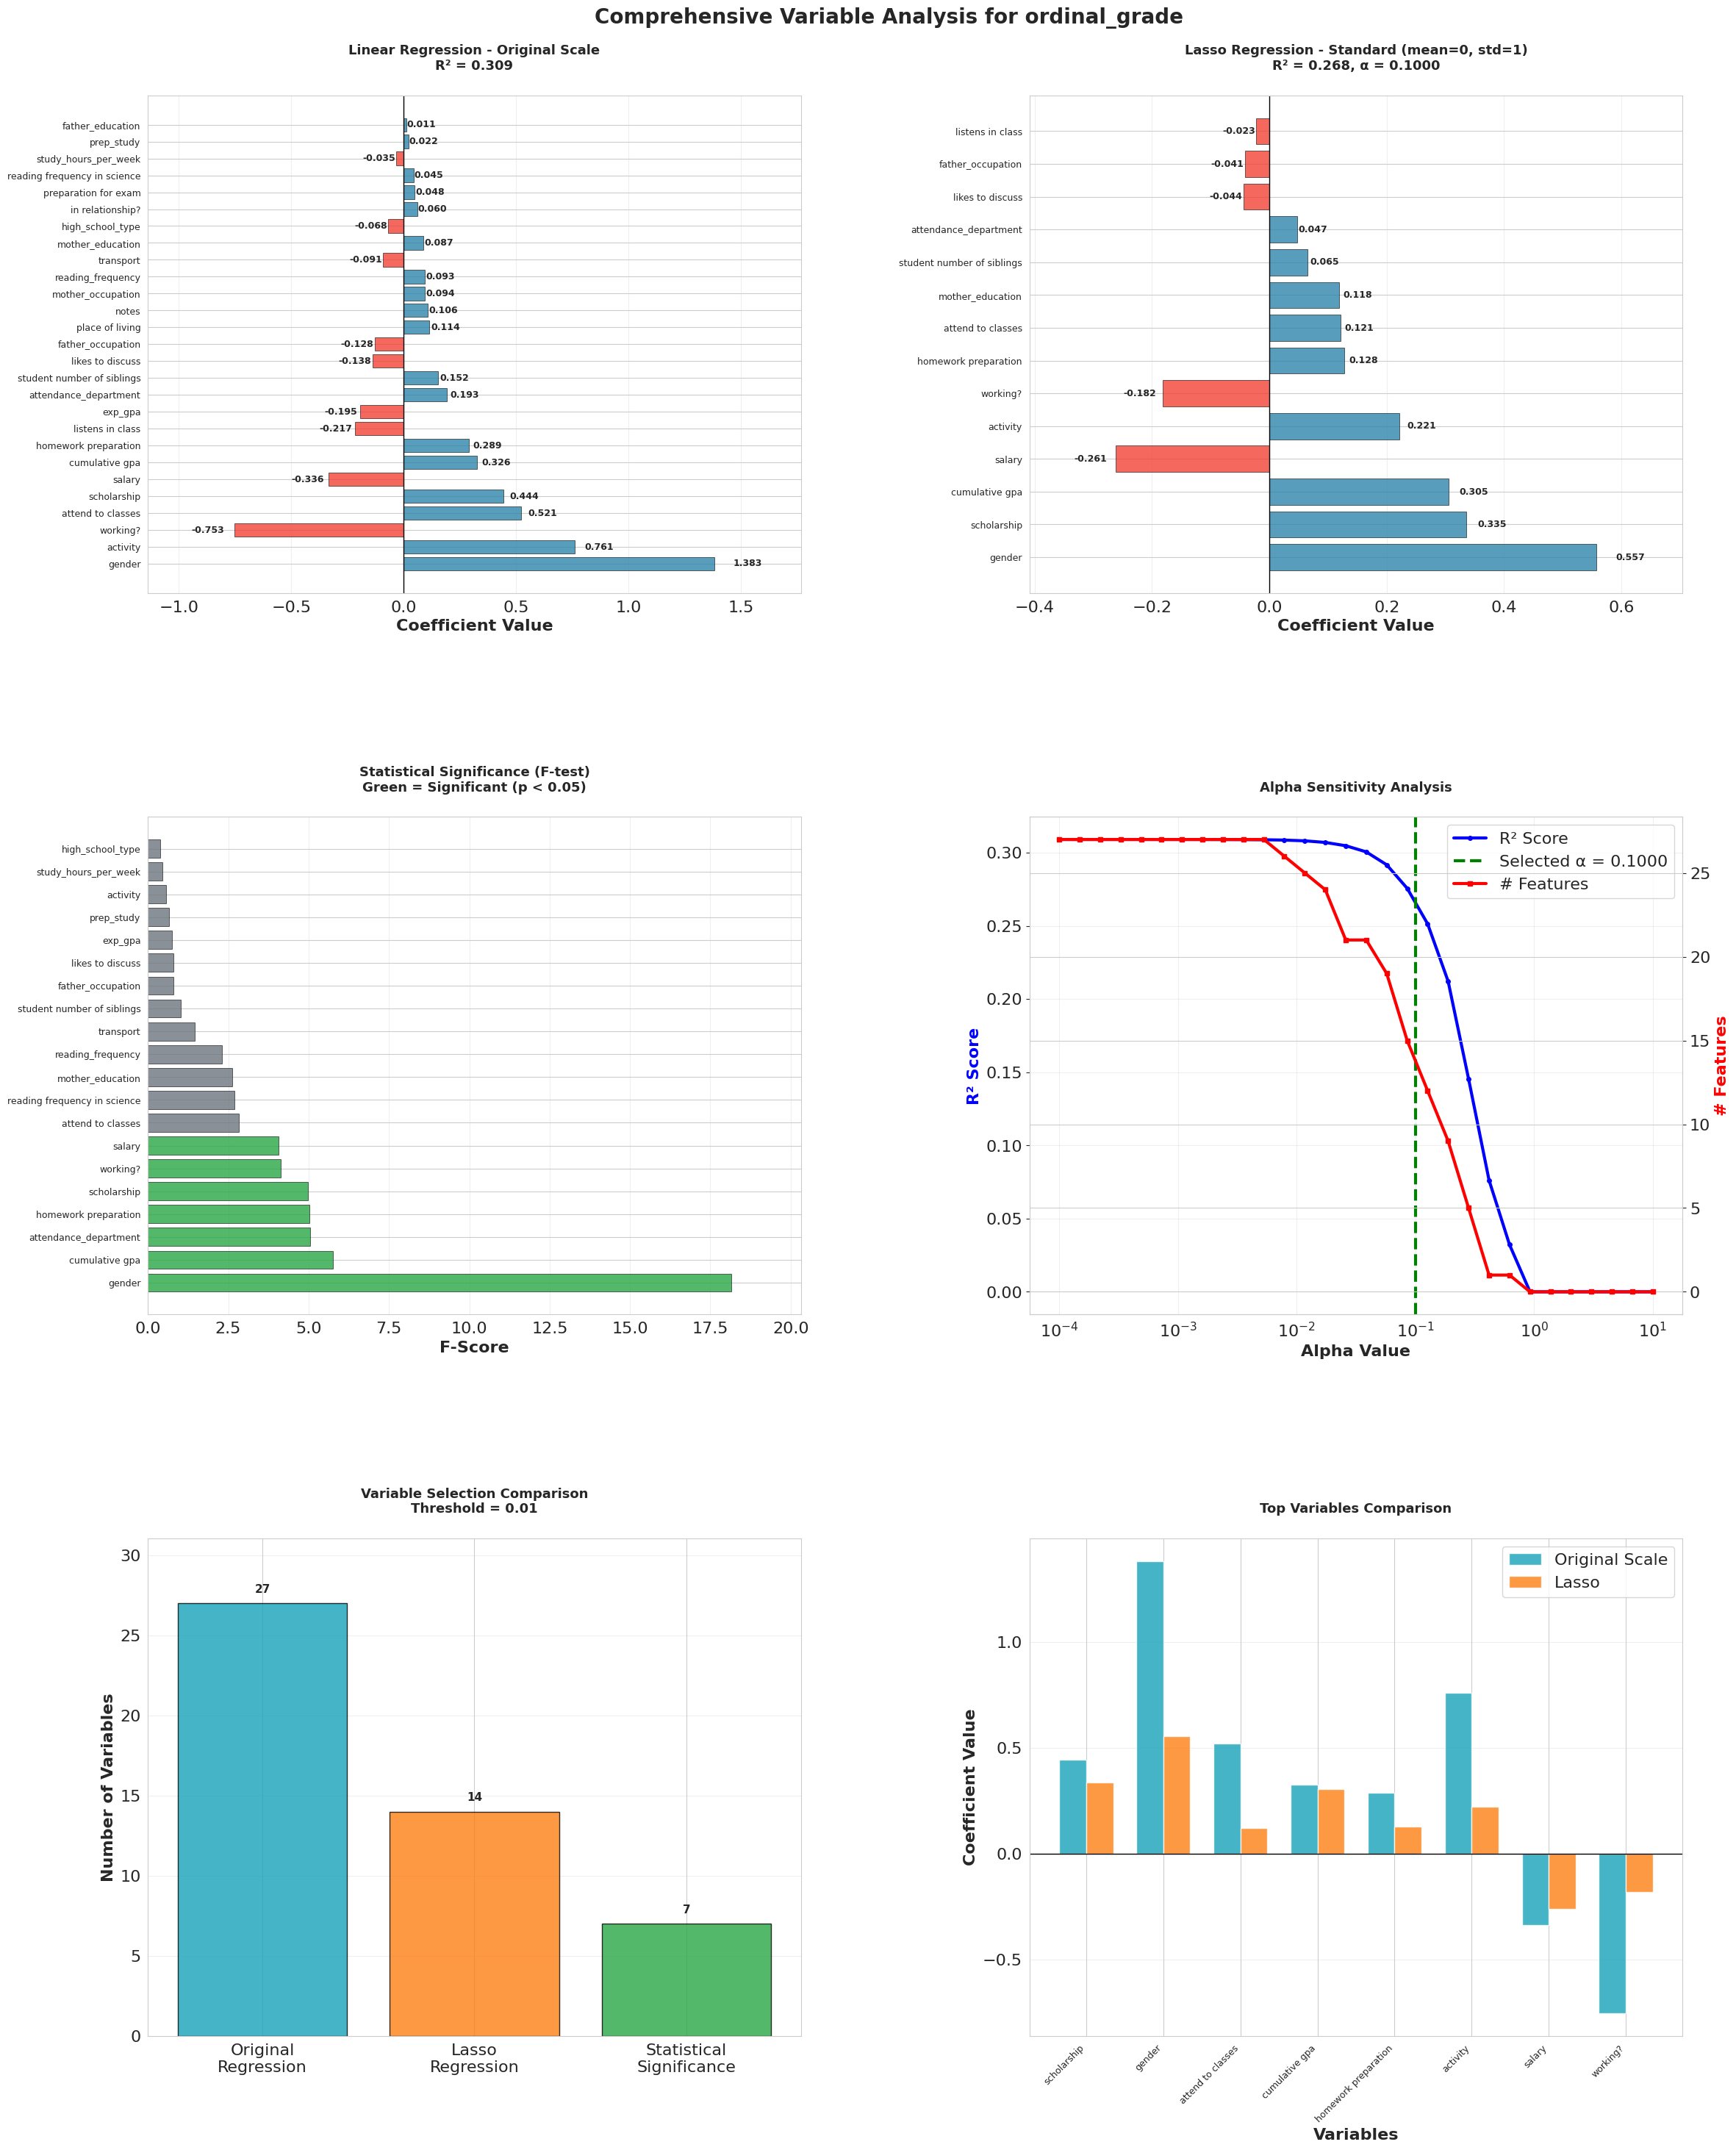


SUMMARY RESULTS
Model Performance:
  Original Scale R²: 0.3090
  Lasso R²:          0.2676
  Best Alpha:        0.100000

Variable Selection:
  Total variables:       27
  Original (>0.01):    27
  Lasso (>0.01):       14
  Statistically sig:     7

Top Lasso Variables:
  1. gender               :   0.5567 ↑ (Cat) Sig:✓
  2. scholarship          :   0.3350 ↑ (Cat) Sig:✓
  3. cumulative gpa       :   0.3053 ↑ (Cat) Sig:✓
  4. salary               :  -0.2613 ↓ (Cat) Sig:✓
  5. activity             :   0.2215 ↑ (Cat) Sig:✗
  6. working?             :  -0.1819 ↓ (Cat) Sig:✓
  7. homework preparation :   0.1283 ↑ (Cat) Sig:✓
  8. attend to classes    :   0.1210 ↑ (Cat) Sig:✗

✅ Analysis complete!
🎯 Best method: Linear

📝 CATEGORICAL VARIABLE ENCODINGS:
  gender: {'Female': np.int64(0), 'Male': np.int64(1)}
  high_school_type: {'Other': np.int64(0), 'Private': np.int64(1), 'State': np.int64(2)}
  scholarship: {'0%': np.int64(0), '100%': np.int64(1), '25%': np.int64(2), '50%': np.int64(3), '

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
import warnings
warnings.filterwarnings('ignore')

# ================================
# CONFIGURATION - CHANGE THESE!
# ================================

# 1. Your data file path

#DATA_FILE_PATH = ('Students_correct_data.csv')

DATA_FILE_PATH = '/content/drive/MyDrive/לימודים שנה ב/Project data science/Project_Students_Omri_Nir/Students_correct_data.csv'

# 2. Target column name
TARGET_COLUMN = 'ordinal_grade'

# 3. Columns to remove (irrelevant columns)
IRRELEVANT_COLUMNS = [
    'grade',           # Wrong values
    'ordinal_grade_range',     # Not relevant
    'studentid',      # ID
    'age',           # Personal name
    'classroom',
    'course id',
    'attend_dept',
    'kids',
]

# 4. Analysis settings
NORMALIZATION_METHOD = 'standard'      # Options: 'none', 'standard', 'minmax', 'robust'
ALPHA_RANGE = 'low'               # Options: 'low', 'auto', 'high', or custom list like [0.01, 0.1, 1.0]
MIN_COEFFICIENT_THRESHOLD = 0.01   # Only show variables with coefficient above this value

print("🚀 COMPLETE VARIABLE ANALYSIS")
print("="*50)
print(f"📁 Data file: {DATA_FILE_PATH}")
print(f"🎯 Target: {TARGET_COLUMN}")
print(f"🗑️ Removing: {IRRELEVANT_COLUMNS}")
print(f"📊 Normalization: {NORMALIZATION_METHOD}")
print(f"🎛️ Alpha range: {ALPHA_RANGE}")
print(f"📏 Min coefficient: {MIN_COEFFICIENT_THRESHOLD}")

# ================================
# STEP 1: LOAD AND CLEAN DATA
# ================================

print(f"\n--- STEP 1: Loading and Cleaning Data ---")

try:
    # Load data
    df = pd.read_csv(DATA_FILE_PATH)
    print(f"✅ Data loaded successfully: {df.shape}")

    # Show available columns
    print(f"📋 Available columns: {list(df.columns)}")

    # Check if target exists
    if TARGET_COLUMN not in df.columns:
        print(f"❌ ERROR: Target column '{TARGET_COLUMN}' not found!")
        print(f"Available columns: {list(df.columns)}")
        raise ValueError(f"Target column '{TARGET_COLUMN}' not found")

    # Remove irrelevant columns
    existing_irrelevant = [col for col in IRRELEVANT_COLUMNS if col in df.columns]
    if existing_irrelevant:
        print(f"🗑️ Removing irrelevant columns: {existing_irrelevant}")
        df = df.drop(columns=existing_irrelevant)

    # Get relevant columns for analysis
    relevant_columns = [col for col in df.columns if col != TARGET_COLUMN]
    print(f"✅ Using {len(relevant_columns)} variables for analysis")

    # Create clean dataset
    df_clean = df[relevant_columns + [TARGET_COLUMN]].copy()

    # Remove rows with missing target
    missing_target = df_clean[TARGET_COLUMN].isnull().sum()
    if missing_target > 0:
        print(f"🧹 Removing {missing_target} rows with missing target values")
        df_clean = df_clean.dropna(subset=[TARGET_COLUMN])

    print(f"📊 Final dataset: {df_clean.shape}")
    print(f"🎯 Target range: {df_clean[TARGET_COLUMN].min():.1f} - {df_clean[TARGET_COLUMN].max():.1f}")

except FileNotFoundError:
    print(f"❌ ERROR: File '{DATA_FILE_PATH}' not found!")
    print("Please check the file path and try again.")
    raise
except Exception as e:
    print(f"❌ ERROR loading data: {str(e)}")
    raise

# ================================
# STEP 2: HANDLE VARIABLE TYPES
# ================================

print(f"\n--- STEP 2: Processing Variable Types ---")

X_columns = relevant_columns
categorical_vars = []
numeric_vars = []
label_encoders = {}

df_processed = df_clean.copy()

# Identify and encode categorical variables
for col in X_columns:
    if df_processed[col].dtype == 'object':
        categorical_vars.append(col)
        print(f"🔤 Encoding categorical variable: {col}")

        # Show unique values
        unique_vals = df_processed[col].unique()
        print(f"    Categories: {unique_vals[:10]}{'...' if len(unique_vals) > 10 else ''}")

        # Apply Label Encoding
        le = LabelEncoder()
        df_processed[col] = df_processed[col].astype(str)

        # Handle missing values
        if df_processed[col].isnull().any() or 'nan' in df_processed[col].values:
            df_processed[col] = df_processed[col].replace('nan', 'missing')
            print(f"    ⚠️ Found missing values, replaced with 'missing'")

        # Encode
        df_processed[col] = le.fit_transform(df_processed[col])
        label_encoders[col] = le

        # Show encoding
        mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(f"    ✅ Encoded as: {mapping}")

    else:
        numeric_vars.append(col)
        print(f"🔢 Numeric variable: {col}")

print(f"\n📊 Variable summary:")
print(f"   Categorical (encoded): {len(categorical_vars)}")
print(f"   Numeric: {len(numeric_vars)}")

# Handle missing values in numeric columns
missing_handled = 0
for col in numeric_vars:
    if df_processed[col].isnull().any():
        missing_count = df_processed[col].isnull().sum()
        median_val = df_processed[col].median()
        df_processed[col].fillna(median_val, inplace=True)
        print(f"🔧 Fixed {missing_count} missing values in {col} with median: {median_val}")
        missing_handled += missing_count

if missing_handled == 0:
    print("✅ No missing values in numeric columns!")

# Prepare final variables
y = df_processed[TARGET_COLUMN]
X = df_processed[relevant_columns]

print(f"\n🎉 Data preprocessing complete!")
print(f"   Final variables: {X.shape[1]}")
print(f"   Final observations: {len(y)}")

# ================================
# STEP 3: ADVANCED ANALYSIS FUNCTION
# ================================

def advanced_variable_analysis(X, y, target_column, normalization, alpha_range, min_coef_threshold):
    """Advanced analysis with different normalization options"""

    print(f"\n--- STEP 3: Advanced Variable Analysis ---")
    print(f"Target: {target_column} (range: {y.min():.1f} - {y.max():.1f})")
    print(f"Normalization: {normalization}")
    print(f"Min coefficient threshold: {min_coef_threshold}")

    # 1. Linear Regression WITHOUT normalization (original scale)
    lr_original = LinearRegression()
    lr_original.fit(X, y)
    r2_original = lr_original.score(X, y)

    coef_original = pd.DataFrame({
        'Variable': X.columns,
        'Coefficient': lr_original.coef_,
        'Abs_Coefficient': np.abs(lr_original.coef_)
    }).sort_values('Abs_Coefficient', ascending=False)

    print(f"📈 Linear Regression (Original Scale):")
    print(f"   R² Score: {r2_original:.4f}")
    print(f"   Coefficient range: {coef_original['Coefficient'].min():.4f} to {coef_original['Coefficient'].max():.4f}")

    # 2. Apply normalization for Lasso
    if normalization == 'standard':
        scaler = StandardScaler()
        scale_name = "Standard (mean=0, std=1)"
    elif normalization == 'minmax':
        scaler = MinMaxScaler()
        scale_name = "MinMax (0 to 1)"
    elif normalization == 'robust':
        scaler = RobustScaler()
        scale_name = "Robust (median=0, IQR=1)"
    elif normalization == 'none':
        scaler = None
        scale_name = "No normalization"
    else:
        raise ValueError("normalization must be 'standard', 'minmax', 'robust', or 'none'")

    if scaler is not None:
        X_scaled = scaler.fit_transform(X)
        print(f"✅ Applied {scale_name}")
    else:
        X_scaled = X.values
        print(f"✅ Using original scale (no normalization)")

    # 3. Set alpha range
    if alpha_range == 'auto':
        alphas = np.logspace(-4, 1, 20)
    elif alpha_range == 'low':
        alphas = np.logspace(-4, -1, 15)
    elif alpha_range == 'high':
        alphas = np.logspace(-1, 2, 15)
    elif isinstance(alpha_range, (list, np.ndarray)):
        alphas = alpha_range
    else:
        alphas = np.logspace(-4, 1, 20)

    print(f"🎛️ Testing alpha range: {alphas[0]:.6f} to {alphas[-1]:.6f}")

    # 4. Lasso Analysis
    lasso_cv = LassoCV(cv=5, alphas=alphas, random_state=42, max_iter=5000)
    lasso_cv.fit(X_scaled, y)
    r2_lasso = lasso_cv.score(X_scaled, y)

    print(f"📈 Lasso Regression ({scale_name}):")
    print(f"   Best Alpha: {lasso_cv.alpha_:.6f}")
    print(f"   R² Score: {r2_lasso:.4f}")

    # 5. Get coefficients
    coef_lasso = pd.DataFrame({
        'Variable': X.columns,
        'Coefficient': lasso_cv.coef_,
        'Abs_Coefficient': np.abs(lasso_cv.coef_)
    }).sort_values('Abs_Coefficient', ascending=False)

    # Filter by threshold
    coef_original_filtered = coef_original[coef_original['Abs_Coefficient'] >= min_coef_threshold].copy()
    coef_lasso_filtered = coef_lasso[coef_lasso['Abs_Coefficient'] >= min_coef_threshold].copy()

    print(f"📏 Variables above threshold ({min_coef_threshold}):")
    print(f"   Original scale: {len(coef_original_filtered)}")
    print(f"   Lasso: {len(coef_lasso_filtered)}")

    # 6. Statistical significance
    f_scores, p_values = f_regression(X, y)
    significance_df = pd.DataFrame({
        'Variable': X.columns,
        'F_Score': f_scores,
        'P_Value': p_values,
        'Significant': p_values < 0.05
    }).sort_values('F_Score', ascending=False)

    significant_vars = significance_df[significance_df['Significant']]['Variable'].tolist()
    print(f"📊 Statistically significant variables (p < 0.05): {len(significant_vars)}")

    # 7. Create visualization with 3x2 layout and improved spacing
    fig = plt.figure(figsize=(24, 30))  # 🔥 LARGER HEIGHT FOR 3 ROWS

    # Set better font sizes
    plt.rcParams['font.size'] = 16
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['axes.labelsize'] = 16
    plt.rcParams['xtick.labelsize'] = 16
    plt.rcParams['ytick.labelsize'] = 16

    # ========================================
    # ROW 1: Original Coefficients (Left) and Lasso Coefficients (Right)
    # ========================================

    # Plot 1: Original coefficients (Row 1, Column 1)
    ax1 = plt.subplot(3, 2, 1)
    if len(coef_original_filtered) > 0:
        colors1 = ['#2E86AB' if x >= 0 else '#F24236' for x in coef_original_filtered['Coefficient']]
        bars1 = ax1.barh(range(len(coef_original_filtered)), coef_original_filtered['Coefficient'],
                         color=colors1, alpha=0.8, edgecolor='black', linewidth=0.5)
        ax1.set_yticks(range(len(coef_original_filtered)))
        ax1.set_yticklabels(coef_original_filtered['Variable'], fontsize=9)
        ax1.set_title(f'Linear Regression - Original Scale\nR² = {r2_original:.3f}',
                      fontweight='bold', pad=25, fontsize=13)
        ax1.set_xlabel('Coefficient Value', fontweight='bold')
        ax1.grid(True, alpha=0.3, axis='x')
        ax1.axvline(x=0, color='black', linestyle='-', linewidth=1)

        # Improved text positioning
        for bar, val in zip(bars1, coef_original_filtered['Coefficient']):
            width = bar.get_width()
            x_pos = width + (abs(width)*0.06 if width >= 0 else -abs(width)*0.06)
            ax1.text(x_pos, bar.get_y() + bar.get_height()/2,
                     f'{val:.3f}', ha='left' if width >= 0 else 'right',
                     va='center', fontsize=9, fontweight='bold')

        ax1.margins(x=0.18)

    # Plot 2: Lasso coefficients (Row 1, Column 2)
    ax2 = plt.subplot(3, 2, 2)
    if len(coef_lasso_filtered) > 0:
        colors2 = ['#2E86AB' if x >= 0 else '#F24236' for x in coef_lasso_filtered['Coefficient']]
        bars2 = ax2.barh(range(len(coef_lasso_filtered)), coef_lasso_filtered['Coefficient'],
                         color=colors2, alpha=0.8, edgecolor='black', linewidth=0.5)
        ax2.set_yticks(range(len(coef_lasso_filtered)))
        ax2.set_yticklabels(coef_lasso_filtered['Variable'], fontsize=9)
        ax2.set_title(f'Lasso Regression - {scale_name}\nR² = {r2_lasso:.3f}, α = {lasso_cv.alpha_:.4f}',
                      fontweight='bold', pad=25, fontsize=13)
        ax2.set_xlabel('Coefficient Value', fontweight='bold')
        ax2.grid(True, alpha=0.3, axis='x')
        ax2.axvline(x=0, color='black', linestyle='-', linewidth=1)

        # Improved text positioning
        for bar, val in zip(bars2, coef_lasso_filtered['Coefficient']):
            width = bar.get_width()
            x_pos = width + (abs(width)*0.06 if width >= 0 else -abs(width)*0.06)
            ax2.text(x_pos, bar.get_y() + bar.get_height()/2,
                     f'{val:.3f}', ha='left' if width >= 0 else 'right',
                     va='center', fontsize=9, fontweight='bold')

        ax2.margins(x=0.18)
    else:
        ax2.text(0.5, 0.5, f'No variables above threshold\nα = {lasso_cv.alpha_:.4f}\nTry lower alpha',
                 ha='center', va='center', transform=ax2.transAxes, fontsize=12,
                 bbox=dict(boxstyle="round,pad=0.5", facecolor="yellow", alpha=0.7))
        ax2.set_title('Lasso - No Variables Selected', fontweight='bold', pad=25)

    # ========================================
    # ROW 2: Statistical Significance (Left) and Alpha Sensitivity (Right)
    # ========================================

    # Plot 3: Statistical significance (Row 2, Column 1)
    ax3 = plt.subplot(3, 2, 3)
    sig_top = significance_df.head(min(20, len(significance_df)))
    colors3 = ['#28A745' if sig else '#6C757D' for sig in sig_top['Significant']]
    bars3 = ax3.barh(range(len(sig_top)), sig_top['F_Score'], color=colors3, alpha=0.8,
                     edgecolor='black', linewidth=0.5)
    ax3.set_yticks(range(len(sig_top)))
    ax3.set_yticklabels(sig_top['Variable'], fontsize=9)
    ax3.set_title(f'Statistical Significance (F-test)\nGreen = Significant (p < 0.05)',
                  fontweight='bold', pad=25, fontsize=13)
    ax3.set_xlabel('F-Score', fontweight='bold')
    ax3.grid(True, alpha=0.3, axis='x')
    ax3.margins(x=0.12)

    # Plot 4: Alpha sensitivity (Row 2, Column 2)
    ax4 = plt.subplot(3, 2, 4)
    test_alphas = np.logspace(-4, 1, 30)
    r2_scores = []
    n_features = []

    for alpha in test_alphas:
        try:
            lasso_test = Lasso(alpha=alpha, max_iter=3000)
            lasso_test.fit(X_scaled, y)
            r2_scores.append(lasso_test.score(X_scaled, y))
            n_features.append(np.sum(np.abs(lasso_test.coef_) >= min_coef_threshold))
        except:
            r2_scores.append(0)
            n_features.append(0)

    ax4_twin = ax4.twinx()
    line1 = ax4.plot(test_alphas, r2_scores, 'b-', linewidth=3, marker='o', markersize=4, label='R² Score')
    line2 = ax4_twin.plot(test_alphas, n_features, 'r-', linewidth=3, marker='s', markersize=4, label='# Features')
    ax4.axvline(x=lasso_cv.alpha_, color='green', linestyle='--', linewidth=3, label=f'Selected α = {lasso_cv.alpha_:.4f}')

    ax4.set_xscale('log')
    ax4.set_xlabel('Alpha Value', fontweight='bold')
    ax4.set_ylabel('R² Score', color='blue', fontweight='bold')
    ax4_twin.set_ylabel('# Features', color='red', fontweight='bold')
    ax4.set_title('Alpha Sensitivity Analysis', fontweight='bold', pad=25, fontsize=13)
    ax4.grid(True, alpha=0.3)

    # Combine legends
    lines1, labels1 = ax4.get_legend_handles_labels()
    lines2, labels2 = ax4_twin.get_legend_handles_labels()
    ax4.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

    # ========================================
    # ROW 3: Method Comparison (Left) and Top Variables Comparison (Right)
    # ========================================

    # Plot 5: Method comparison (Row 3, Column 1)
    ax5 = plt.subplot(3, 2, 5)
    methods = ['Original\nRegression', 'Lasso\nRegression', 'Statistical\nSignificance']
    counts = [len(coef_original_filtered), len(coef_lasso_filtered), len(significant_vars)]
    colors5 = ['#17A2B8', '#FD7E14', '#28A745']

    bars5 = ax5.bar(methods, counts, color=colors5, alpha=0.8, edgecolor='black', linewidth=1)
    ax5.set_ylabel('Number of Variables', fontweight='bold')
    ax5.set_title(f'Variable Selection Comparison\nThreshold = {min_coef_threshold}',
                  fontweight='bold', pad=25, fontsize=13)
    ax5.grid(True, alpha=0.3, axis='y')

    # Add count labels on bars
    for bar, count in zip(bars5, counts):
        height = bar.get_height()
        ax5.text(bar.get_x() + bar.get_width()/2., height + max(counts)*0.02,
                 f'{count}', ha='center', va='bottom', fontweight='bold', fontsize=11)

    ax5.set_ylim(0, max(counts) * 1.15)

    # Plot 6: Top variables comparison (Row 3, Column 2)
    ax6 = plt.subplot(3, 2, 6)
    if len(coef_original_filtered) > 0 or len(coef_lasso_filtered) > 0:
        # Get top variables from both methods
        top_orig = set(coef_original_filtered.head(8)['Variable']) if len(coef_original_filtered) > 0 else set()
        top_lasso = set(coef_lasso_filtered.head(8)['Variable']) if len(coef_lasso_filtered) > 0 else set()
        all_top = list(top_orig.union(top_lasso))[:10]  # Limit to 10 for readability

        if len(all_top) > 0:
            comparison_df = pd.DataFrame({'Variable': all_top})
            comparison_df = comparison_df.merge(
                coef_original[['Variable', 'Coefficient']].rename(columns={'Coefficient': 'Original'}),
                on='Variable', how='left'
            ).merge(
                coef_lasso[['Variable', 'Coefficient']].rename(columns={'Coefficient': 'Lasso'}),
                on='Variable', how='left'
            ).fillna(0)

            x = np.arange(len(comparison_df))
            width = 0.35

            bars6_1 = ax6.bar(x - width/2, comparison_df['Original'], width,
                              label='Original Scale', alpha=0.8, color='#17A2B8')
            bars6_2 = ax6.bar(x + width/2, comparison_df['Lasso'], width,
                              label='Lasso', alpha=0.8, color='#FD7E14')

            ax6.set_xlabel('Variables', fontweight='bold')
            ax6.set_ylabel('Coefficient Value', fontweight='bold')
            ax6.set_title('Top Variables Comparison', fontweight='bold', pad=25, fontsize=13)
            ax6.set_xticks(x)
            ax6.set_xticklabels(comparison_df['Variable'], rotation=45, ha='right', fontsize=9)
            ax6.legend(loc='upper right')
            ax6.grid(True, alpha=0.3, axis='y')
            ax6.axhline(y=0, color='black', linestyle='-', linewidth=1)
        else:
            ax6.text(0.5, 0.5, 'No variables available\nfor comparison',
                     ha='center', va='center', transform=ax6.transAxes, fontsize=12)
            ax6.set_title('Top Variables Comparison', fontweight='bold', pad=25)
    else:
        ax6.text(0.5, 0.5, 'No variables available\nfor comparison',
                 ha='center', va='center', transform=ax6.transAxes, fontsize=12)
        ax6.set_title('Top Variables Comparison', fontweight='bold', pad=25)

    # ========================================
    # IMPROVED SUBPLOT SPACING FOR 3x2 LAYOUT
    # ========================================
    plt.subplots_adjust(
        left=0.08,     # Left margin
        bottom=0.05,   # Bottom margin (smaller for 3 rows)
        right=0.95,    # Right margin
        top=0.93,      # Top margin (more space for main title)
        wspace=0.35,   # Width spacing between columns
        hspace=0.45    # Height spacing between rows (more for 3 rows)
    )

    # Add main title with more space
    fig.suptitle(f'Comprehensive Variable Analysis for {target_column}',
                 fontsize=20, fontweight='bold', y=0.97)

    plt.show()

    # 8. Print summary
    print(f"\n" + "="*60)
    print(f"SUMMARY RESULTS")
    print(f"="*60)
    print(f"Model Performance:")
    print(f"  Original Scale R²: {r2_original:.4f}")
    print(f"  Lasso R²:          {r2_lasso:.4f}")
    print(f"  Best Alpha:        {lasso_cv.alpha_:.6f}")

    print(f"\nVariable Selection:")
    print(f"  Total variables:       {len(X.columns)}")
    print(f"  Original (>{min_coef_threshold}):    {len(coef_original_filtered)}")
    print(f"  Lasso (>{min_coef_threshold}):       {len(coef_lasso_filtered)}")
    print(f"  Statistically sig:     {len(significant_vars)}")

    if len(coef_lasso_filtered) > 0:
        print(f"\nTop Lasso Variables:")
        for i, (_, row) in enumerate(coef_lasso_filtered.head(8).iterrows(), 1):
            impact = "↑" if row['Coefficient'] > 0 else "↓"
            var_type = "(Cat)" if row['Variable'] in categorical_vars else "(Num)"
            is_sig = "✓" if row['Variable'] in significant_vars else "✗"
            print(f"  {i}. {row['Variable']:<20} : {row['Coefficient']:8.4f} {impact} {var_type} Sig:{is_sig}")

    return {
        'original_coef': coef_original,
        'lasso_coef': coef_lasso,
        'significance': significance_df,
        'r2_original': r2_original,
        'r2_lasso': r2_lasso,
        'alpha': lasso_cv.alpha_
    }

# ================================
# STEP 4: RUN THE ANALYSIS
# ================================

print(f"\n🔬 Running analysis with your settings...")

results = advanced_variable_analysis(
    X=X,
    y=y,
    target_column=TARGET_COLUMN,
    normalization=NORMALIZATION_METHOD,
    alpha_range=ALPHA_RANGE,
    min_coef_threshold=MIN_COEFFICIENT_THRESHOLD
)

print(f"\n✅ Analysis complete!")
print(f"🎯 Best method: {'Lasso' if results['r2_lasso'] > results['r2_original'] else 'Linear'}")

# Show categorical variable encodings
if categorical_vars:
    print(f"\n📝 CATEGORICAL VARIABLE ENCODINGS:")
    for var in categorical_vars[:5]:  # Show first 5
        if var in label_encoders:
            le = label_encoders[var]
            mapping = dict(zip(le.classes_, le.transform(le.classes_)))
            print(f"  {var}: {mapping}")
    if len(categorical_vars) > 5:
        print(f"  ... and {len(categorical_vars)-5} more categorical variables")